# Importing meaningful libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rn

from scipy import stats
import regex as re


seed = 42

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [2]:
lap=pd.read_csv("C:/Users/JUNIOR/Favorites/Links/new/jUPYTER/projjjjjjjjjject/Projects/Regression/laptops_train.csv")
lap1=pd.read_csv("C:/Users/JUNIOR/Favorites/Links/new/jUPYTER/projjjjjjjjjject/Projects/Regression/laptops_test.csv")
lap.head()


,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [3]:
def infos():
    print(lap.info())
    print(80* "*")
    print("\n")
    print(lap.describe())
    
    
infos()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB
None
***********

# Data cleaning

Let's first explore the various operating system versions


# Operating System Version

In [4]:
lap["Operating System Version"].value_counts()

10      819
7        10
10 S      8
X         4
Name: Operating System Version, dtype: int64

In [5]:
new=(lap["Operating System Version"]=="10") | (lap["Operating System Version"]=="X")
lap.loc[new]

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
5,Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows,10,2.1kg,3556800.00
6,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS,X,2.04kg,19028613.24
8,Asus,ZenBook UX430UN,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows,10,1.3kg,13293540.00
9,Acer,Swift 3,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,10,1.6kg,6846840.00
13,Dell,Inspiron 3567,Notebook,"15.6""",Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,AMD Radeon R5 M430,Windows,10,2.2kg,4436218.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,Dell,Latitude E7470,Ultrabook,"14.0""",Touchscreen 2560x1440,Intel Core i7 6600U 2.6GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows,10,1.5kg,17454818.16
972,Dell,Alienware 17,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,4.42kg,24897600.00
973,Toshiba,Tecra A40-C-1DF,Notebook,"14.0""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows,10,1.95kg,10492560.00
974,Asus,Rog Strix,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,10,2.73kg,18227710.80


Suffice to say from the dataset below , operating system "X" is the same as operating system "10"
so we have to work with them  as a single entity

In [6]:
lap["Operating System Version"]=lap["Operating System Version"].replace("X","10")
lap1["Operating System Version"]=lap1["Operating System Version"].replace("X","10")
lap["Operating System Version"].value_counts()

10      823
7        10
10 S      8
Name: Operating System Version, dtype: int64

from the above analysis ,we could see there are missing values in the "operating system version" column.
Let's handle them

In [7]:
lap["Operating System Version"].isnull().sum()

136

In [8]:
lap[lap["Operating System Version"].isnull()].head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


from the above analysis ,it would be quite difficult to replace the missing values with some random values/versions .
To avoid dropping 136 of them , let's replace the missing values with 0

In [9]:
lap["Operating System Version"].fillna(0,inplace=True)
lap1["Operating System Version"].fillna(0,inplace=True)
lap.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,0,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,0,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,0,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,0,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,0,1.37kg,16037611.20


# Operating System

Let's treat Mac OS and macOS as a single entity

In [10]:
lap["Operating System"]=lap["Operating System"].replace("Mac OS","macOS")
lap1["Operating System"]=lap1["Operating System"].replace("Mac OS","macOS")
lap["Operating System"].value_counts()

Windows      837
No OS         52
Linux         48
Chrome OS     22
macOS         17
Android        1
Name: Operating System, dtype: int64

Let's check available  duplicates and drop them  if there are any

In [11]:
lap[lap.duplicated()]
lap=lap.drop_duplicates()

lap1[lap1.duplicated()]
lap1=lap1.drop_duplicates()

# Weight & RAM

Let's rename the "Weight" and "Ram" columns. Let's drop the respective units("kg" and "GB") from their columns

In [12]:

lap=lap.rename(columns={"Weight":"Weight (kg)","RAM":"RAM (GB)"})
lap["RAM (GB)"]=lap["RAM (GB)"].apply(lambda x:x.strip())
lap["RAM (GB)"]=lap["RAM (GB)"].apply(lambda x:x[0:-2])
lap["RAM (GB)"]=lap["RAM (GB)"].apply(lambda x: int(x))
lap["Weight (kg)"]=lap["Weight (kg)"].apply(lambda x:x.strip())
lap["Weight (kg)"]=lap["Weight (kg)"].apply(lambda x:x.split("k")[0])
lap["Weight (kg)"]=lap["Weight (kg)"].apply(lambda x: float(x))
lap.head()





lap1=lap1.rename(columns={"Weight":"Weight (kg)","RAM":"RAM (GB)"})
lap1["RAM (GB)"]=lap1["RAM (GB)"].apply(lambda x:x.strip())
lap1["RAM (GB)"]=lap1["RAM (GB)"].apply(lambda x:x[0:-2])
lap1["RAM (GB)"]=lap1["RAM (GB)"].apply(lambda x: int(x))
lap1["Weight (kg)"]=lap1["Weight (kg)"].apply(lambda x:x.strip())
lap1["Weight (kg)"]=lap1["Weight (kg)"].apply(lambda x:x.split("k")[0])
lap1["Weight (kg)"]=lap1["Weight (kg)"].apply(lambda x: float(x))
lap.head()


,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM (GB),Storage,GPU,Operating System,Operating System Version,Weight (kg),Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,0,1.37,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,0,1.34,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,0,1.86,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,0,1.83,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,0,1.37,16037611.20


In [13]:
def GPU_NAMES(GPU):
    AMD_Radeon_R_Series=["AMD FirePro W4190M","AMD FirePro W4190M","AMD Radeon R5 520","AMD Radeon R9 M385","AMD R4 Graphics","AMD Radeon RX 560","AMD R17M-M1-70","AMD Radeon R5 430","AMD Radeon R7 M440","AMD FirePro W5130M","AMD Radeon R7 M365X","AMD Radeon Pro 555","AMD Radeon R7","AMD Radeon R7 M465","AMD Radeon R3","AMD Radeon R7 Graphics","AMD Radeon Pro 560","AMD Radeon 540","AMD Radeon Pro 455","AMD Radeon R7 M460","AMD Radeon RX 540","AMD FirePro W4190M","AMD Radeon R2 Graphics","AMD Radeon R4","AMD Radeon R2 Graphics","AMD Radeon RX 580","AMD Radeon R2","AMD Radeon R4 Graphics","AMD Radeon RX 550","AMD Radeon R5 M420X","AMD Radeon R7 M445","AMD Radeon R5 M420","AMD Radeon R5","AMD Radeon RX 580","AMD Radeon R2","AMD Radeon R4 Graphics","AMD Radeon RX 550"]
    Nvidia_GTX=["Nvidia GeForce 920MX","Nvidia GeForce 930MX","Nvidia GeForce GTX1060","Nvidia GeForce GTX 1050Ti","Nvidia GeForce GTX 960<U+039C>","Nvidia GeForce 920MX","Nvidia GeForce 930MX","Nvidia Quadro M1200","Nvidia GeForce GTX 1080","Nvidia GeForce MX130","Intel HD Graphics 515","Nvidia GeForce 930MX","Nvidia Quadro M620","Nvidia GeForce 930M","Nvidia GeForce GTX 950M" ,"Nvidia GeForce 920MX","Nvidia GeForce GT 940MX","Nvidia GeForce GTX 940MX","Nvidia GeForce 150MX","Nvidia Quadro M2200M","Nvidia GeForce GTX 980M","Nvidia GeForce GTX 1050M","Nvidia GeForce GTX 960M","Nvidia Quadro M2200","Nvidia GeForce GTX 965M","Nvidia Quadro M2000M","Nvidia Quadro M1000M","Nvidia Quadro M520M","Nvidia GeForce 920M","Nvidia GeForce GTX 940M","Nvidia GeForce GTX 1070M","GeForce GTX1060","Nvidia GeForce 920","Nvidia GeForce 940M","Nvidia GeForce GTX 930MX","Nvidia GeForce GTX 1050 Ti","Nvidia GTX 980 SLI","Nvidia GeForce GTX1080","Nvidia GeForce GTX1050 Ti","Nvidia Quadro M620M","Nvidia GeForce GTX 970M","Nvidia GeForce GTX 960","Nvidia GeForce GTX 960"]
    Intel_Graphics=["Intel Graphics 620","Intel Iris Graphics 540","Intel HD Graphics 515","Intel HD Graphics 6000","Intel HD Graphics 630","Intel HD Graphics 510","Intel Iris Plus Graphics 650","Intel Iris Pro Graphics","Intel HD Graphics 540","Intel HD Graphics 5300","Intel Iris Graphics 550","Intel HD Graphics 530","Intel Graphics 620 ","AMD Radeon RX 560", "Intel Iris Plus Graphics 640","Intel HD Graphics 405"]
    
    
    if GPU in AMD_Radeon_R_Series:
        return "AMD_Radeon_R_Series"
    elif GPU in Nvidia_GTX:
        return "Nvidia_GTX"
    elif GPU in Intel_Graphics:
        return "Intel_Graphics"
    else:
        return GPU
     
    
lap["GPU (new)"]=lap["GPU"].apply(GPU_NAMES)
    
lap1["GPU (new)"]=lap1["GPU"].apply(GPU_NAMES)
lap.head()


,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM (GB),Storage,GPU,Operating System,Operating System Version,Weight (kg),Price,GPU (new)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,0,1.37,11912523.48,Intel_Graphics
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,0,1.34,7993374.48,Intel_Graphics
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,0,1.86,5112900.00,Intel HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,0,1.83,22563005.40,AMD_Radeon_R_Series
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,0,1.37,16037611.20,Intel_Graphics



# STORAGE

creating a new storge column called storage_type

In [14]:
def process_column_A(text):
    if "HDD" in text and "SSD" in text:
        return "both SSD and HDD"
    if 'HDD' in text:
        return 'HDD'
    elif 'SSD' in text:
        return 'SSD'
    elif "Flash Storage" in text:
        return "Flash Storage"
    elif "Hybrid" in text:
        return "Hybrid"
    else:
        pass

# Applying the function to create column B
lap['storage_type'] = lap[' Storage'].apply(process_column_A)
lap1['storage_type'] = lap1[' Storage'].apply(process_column_A)
lap.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM (GB),Storage,GPU,Operating System,Operating System Version,Weight (kg),Price,GPU (new),storage_type
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,0,1.37,11912523.48,Intel_Graphics,SSD
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,0,1.34,7993374.48,Intel_Graphics,Flash Storage
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,0,1.86,5112900.00,Intel HD Graphics 620,SSD
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,0,1.83,22563005.40,AMD_Radeon_R_Series,SSD
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,0,1.37,16037611.20,Intel_Graphics,SSD


creating a duplicate of the dataset

In [15]:
#lap2["Price"]


In [16]:
lap2=lap.copy()
lap2["Price"]

0      11912523.48
1       7993374.48
2       5112900.00
3      22563005.40
4      16037611.20
          ...     
972    24897600.00
973    10492560.00
974    18227710.80
975     8705268.00
976     8909784.00
Name: Price, Length: 977, dtype: float64

correcting some errors in the storage column

In [17]:
lap2[" Storage"]=lap2[" Storage"].replace("1GB SSD","1TB SSD")
lap2[" Storage"]=lap2[" Storage"].replace("8GB SSD","8TB SSD")
lap2[" Storage"]=lap2[" Storage"].replace("32GB SSD","32GB HDD")
lap2[" Storage"]=lap2[" Storage"].replace('64GB SSD','64GB HDD')

lap1[" Storage"]=lap1[" Storage"].replace("1GB SSD","1TB SSD")
lap1[" Storage"]=lap1[" Storage"].replace("8GB SSD","8TB SSD")
lap1[" Storage"]=lap1[" Storage"].replace("32GB SSD","32GB HDD")
lap1[" Storage"]=lap1[" Storage"].replace('64GB SSD','64GB HDD')

creating two different new columns from the storsge column

In [18]:
def storage_1(x):
    try:
        y = x.split("+")[0].strip()
        if "GB" in y:
            a = int(y.split(" ")[0][0:-2])
            return a
        elif "TB" in y:
            a=int(y.split(" ")[0][0:-2])*1000
            return a
    except:
        if "Flash Storage" in x:
            a=x.split(" ")[0][0:-2]
            b=int(a)
            return b
        elif "Hybrid" in x:
            a = x.split(" ")[0][:-2]
            b = int(a) 
            return b
        elif "GB" in x:
            a = int(x.split(" ")[0][0:-2])
            return a
        elif "TB" in x:
            a = int(x.split(" ")[0][0:-2])*1000
            return a
        
        
def storage_2(x):
    try:
        y = x.split("+")[1].strip()
        if "GB" in y:
            a = int(y.split(" ")[0][0:-2])
            return a
        elif "TB" in y:
            a=int(y.split(" ")[0][0:-2])*1000
            return a
    except:
        if "Flash Storage" in x:
            return 0.0
        elif "Hybrid" in x:
            return 0.0
        elif "GB" in x:
            return 0.0
       
        elif "TB" in x:
            return 0.0
        
        
        
lap2["storage_1"]=lap2[" Storage"].apply(storage_1)
lap2["storage_2"]=lap2[" Storage"].apply(storage_2)

lap1["storage_1"]=lap1[" Storage"].apply(storage_1)
lap1["storage_2"]=lap1[" Storage"].apply(storage_2)

#lap2[["storage_1","storage_2"," Storage","total_storage"]]


#lap1["total_storage"]=lap1["storage_1"]+lap2["storage_2"]

# Assuming lap2 is your DataFrame with a column named 'Storage'

            
           
                
            
        
            
        
        
lap2.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM (GB),Storage,GPU,Operating System,Operating System Version,Weight (kg),Price,GPU (new),storage_type,storage_1,storage_2
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,0,1.37,11912523.48,Intel_Graphics,SSD,128,0.0
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,0,1.34,7993374.48,Intel_Graphics,Flash Storage,128,0.0
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,0,1.86,5112900.00,Intel HD Graphics 620,SSD,256,0.0
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,0,1.83,22563005.40,AMD_Radeon_R_Series,SSD,512,0.0
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,0,1.37,16037611.20,Intel_Graphics,SSD,256,0.0


# Screen

Looks like the screen column has three different informations. 



-Screen type


-Resolution


-Touchscreen

In [19]:
lap2["Screen"].value_counts()

Full HD 1920x1080                                397
IPS Panel Full HD 1920x1080                      181
1366x768                                         180
Full HD / Touchscreen 1920x1080                   38
IPS Panel Full HD / Touchscreen 1920x1080         35
1600x900                                          19
Touchscreen 1366x768                              15
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
IPS Panel 4K Ultra HD 3840x2160                   10
4K Ultra HD / Touchscreen 3840x2160                9
Quad HD+ / Touchscreen 3200x1800                   8
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
Touchscreen 2560x1440                              5
4K Ultra HD 3840x2160                              5
1440x900                                           4
IPS Panel Retina Display 2880x1800                 4
IPS Panel 2560x1440                           

In [20]:
lap2['resolution'] = lap2['Screen'].str.extract(r'(\d+x\d+)')
lap2['screen_type'] = lap2['Screen'].replace(r'(\d+x\d+)','', regex = True)
lap2['screen_type'] = lap2['screen_type'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','', regex = True)
lap2['touchscreen'] = lap2['screen_type'].str.extract(r'(Touchscreen)')
lap2['screen_type'] = lap2['screen_type'].replace(r'(Touchscreen)','', regex = True)

lap2['touchscreen'] = lap2['touchscreen'].replace('Touchscreen', 1)
lap2['touchscreen'] = lap2['touchscreen'].replace(np.nan, 0)

lap2['screen_type'] = lap2['screen_type'].replace(r'^\s*$', np.nan, regex = True)
lap2['screen_type'] = lap2['screen_type'].replace(r' ','', regex = True)

lap2.drop("Screen",axis=1,inplace=True)




lap1['resolution'] = lap1['Screen'].str.extract(r'(\d+x\d+)')
lap1['screen_type'] = lap1['Screen'].replace(r'(\d+x\d+)','', regex = True)
lap1['screen_type'] = lap1['screen_type'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','', regex = True)
lap1['touchscreen'] = lap1['screen_type'].str.extract(r'(Touchscreen)')
lap1['screen_type'] = lap1['screen_type'].replace(r'(Touchscreen)','', regex = True)

lap1['touchscreen'] = lap1['touchscreen'].replace('Touchscreen', 1)
lap1['touchscreen'] = lap1['touchscreen'].replace(np.nan, 0)

lap1['screen_type'] = lap1['screen_type'].replace(r'^\s*$', np.nan, regex = True)
lap1['screen_type'] = lap1['screen_type'].replace(r' ','', regex = True)

lap1.drop("Screen",axis=1,inplace=True)

lap2.head()



,Manufacturer,Model Name,Category,Screen Size,CPU,RAM (GB),Storage,GPU,Operating System,Operating System Version,Weight (kg),Price,GPU (new),storage_type,storage_1,storage_2,resolution,screen_type,touchscreen
0,Apple,MacBook Pro,Ultrabook,"13.3""",Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,0,1.37,11912523.48,Intel_Graphics,SSD,128,0.0,2560x1600,IPSPanelRetinaDisplay,0.0
1,Apple,Macbook Air,Ultrabook,"13.3""",Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,0,1.34,7993374.48,Intel_Graphics,Flash Storage,128,0.0,1440x900,NaN,0.0
2,HP,250 G6,Notebook,"15.6""",Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,0,1.86,5112900.00,Intel HD Graphics 620,SSD,256,0.0,1920x1080,NaN,0.0
3,Apple,MacBook Pro,Ultrabook,"15.4""",Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,0,1.83,22563005.40,AMD_Radeon_R_Series,SSD,512,0.0,2880x1800,IPSPanelRetinaDisplay,0.0
4,Apple,MacBook Pro,Ultrabook,"13.3""",Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,0,1.37,16037611.20,Intel_Graphics,SSD,256,0.0,2560x1600,IPSPanelRetinaDisplay,0.0


In [21]:
lap2.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'CPU',
       'RAM (GB)', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight (kg)', 'Price', 'GPU (new)',
       'storage_type', 'storage_1', 'storage_2', 'resolution', 'screen_type',
       'touchscreen'],
      dtype='object')

new=['resolution','screen_type', 'touchscreen']
for i in new:
    print("\n", lap2[i].value_counts())

# CPU

Let's work on the CPU now

The CPU also contains useful informations .Let's explore them

In [22]:
lap2["CPU"].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [23]:
lap2['cpu_freq (GHz)'] = lap2['CPU'].str.extract(r'(\d+(?:\.\d+)?GHz)') 
lap2['cpu_freq (GHz)'] = lap2['cpu_freq (GHz)'].str.replace('GHz', '')
lap2['cpu_freq (GHz)'] = lap2['cpu_freq (GHz)'].astype(float)



lap1['cpu_freq (GHz)'] = lap1['CPU'].str.extract(r'(\d+(?:\.\d+)?GHz)') 
lap1['cpu_freq (GHz)'] = lap1['cpu_freq (GHz)'].str.replace('GHz', '')
lap1['cpu_freq (GHz)'] = lap1['cpu_freq (GHz)'].astype(float)


Then, we delete the frequency from the CPU column.

In [24]:
lap2['CPU']= lap2['CPU'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex = True)
lap2.head()

lap1['CPU']= lap1['CPU'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex = True)


# GPU

In [25]:
lap2[["CPU","GPU"]]

,CPU,GPU
0,Intel Core i5,Intel Iris Plus Graphics 640
1,Intel Core i5,Intel HD Graphics 6000
2,Intel Core i5 7200U,Intel HD Graphics 620
3,Intel Core i7,AMD Radeon Pro 455
4,Intel Core i5,Intel Iris Plus Graphics 650
...,...,...
972,Intel Core i7 6700HQ,Nvidia GeForce GTX 1070
973,Intel Core i5 6200U,Intel HD Graphics 520
974,Intel Core i7 7700HQ,Nvidia GeForce GTX 1060
975,Intel Core i5 7200U,Nvidia GeForce 930MX


In [26]:
lap2['cpu_brand'] = lap2['CPU'].str.extract(r'^(\w+)')
lap2['gpu_brand'] = lap2['GPU'].str.extract(r'^(\w+)')

lap1['cpu_brand'] = lap1['CPU'].str.extract(r'^(\w+)')
lap1['gpu_brand'] = lap1['GPU'].str.extract(r'^(\w+)')



lap2.head()

,Manufacturer,Model Name,Category,Screen Size,CPU,RAM (GB),Storage,GPU,Operating System,Operating System Version,...,GPU (new),storage_type,storage_1,storage_2,resolution,screen_type,touchscreen,cpu_freq (GHz),cpu_brand,gpu_brand
0,Apple,MacBook Pro,Ultrabook,"13.3""",Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,0,...,Intel_Graphics,SSD,128,0.0,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,Intel,Intel
1,Apple,Macbook Air,Ultrabook,"13.3""",Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,0,...,Intel_Graphics,Flash Storage,128,0.0,1440x900,NaN,0.0,1.8,Intel,Intel
2,HP,250 G6,Notebook,"15.6""",Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,0,...,Intel HD Graphics 620,SSD,256,0.0,1920x1080,NaN,0.0,2.5,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,"15.4""",Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,0,...,AMD_Radeon_R_Series,SSD,512,0.0,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,"13.3""",Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,0,...,Intel_Graphics,SSD,256,0.0,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,Intel,Intel


In [27]:
lap2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 977 entries, 0 to 976
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   CPU                       977 non-null    object 
 5   RAM (GB)                  977 non-null    int64  
 6    Storage                  977 non-null    object 
 7   GPU                       977 non-null    object 
 8   Operating System          977 non-null    object 
 9   Operating System Version  977 non-null    object 
 10  Weight (kg)               977 non-null    float64
 11  Price                     977 non-null    float64
 12  GPU (new)                 977 non-null    object 
 13  storage_type              977 non-null    object 
 14  storage_1 

The dataset looks clean now

Let's perform some EDA on them

# Exploratory Data Analysis (EDA)

In [28]:
lap2.Price

0      11912523.48
1       7993374.48
2       5112900.00
3      22563005.40
4      16037611.20
          ...     
972    24897600.00
973    10492560.00
974    18227710.80
975     8705268.00
976     8909784.00
Name: Price, Length: 977, dtype: float64

# Which brand is the most frequent in the dataframe?

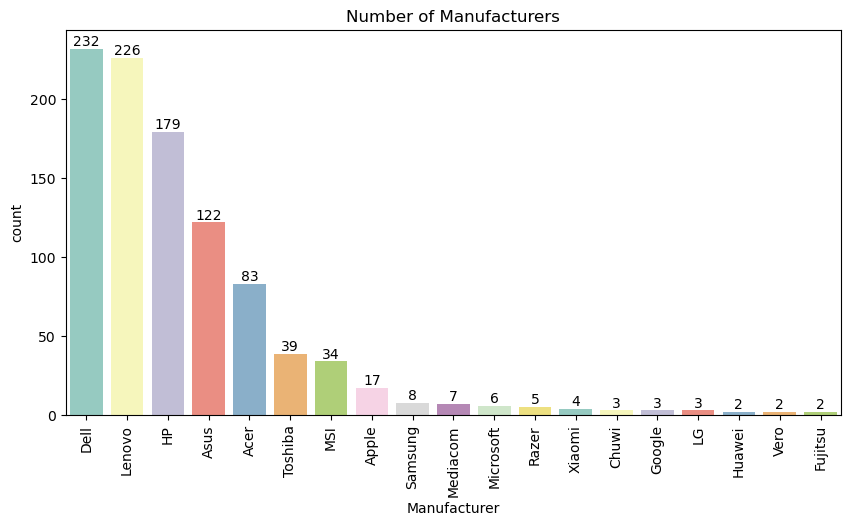

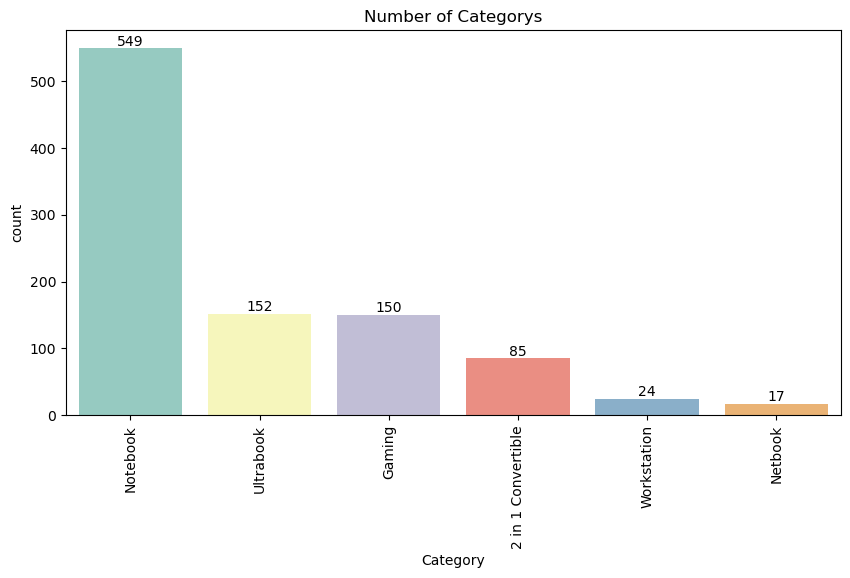

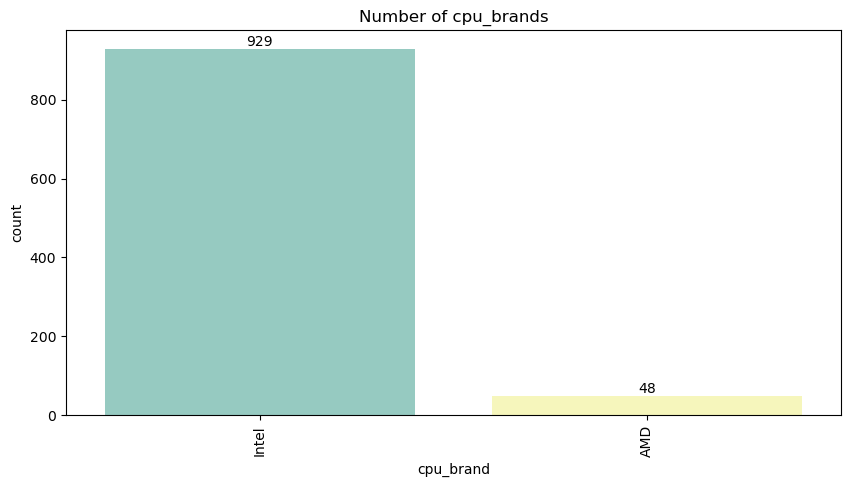

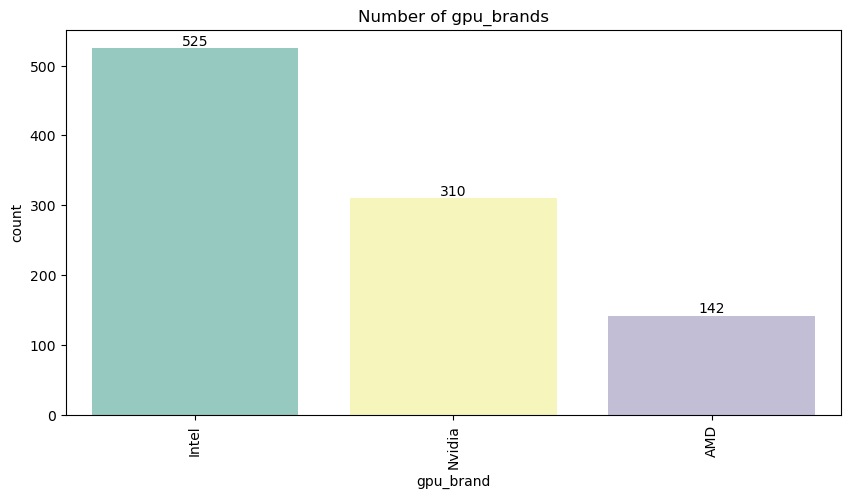

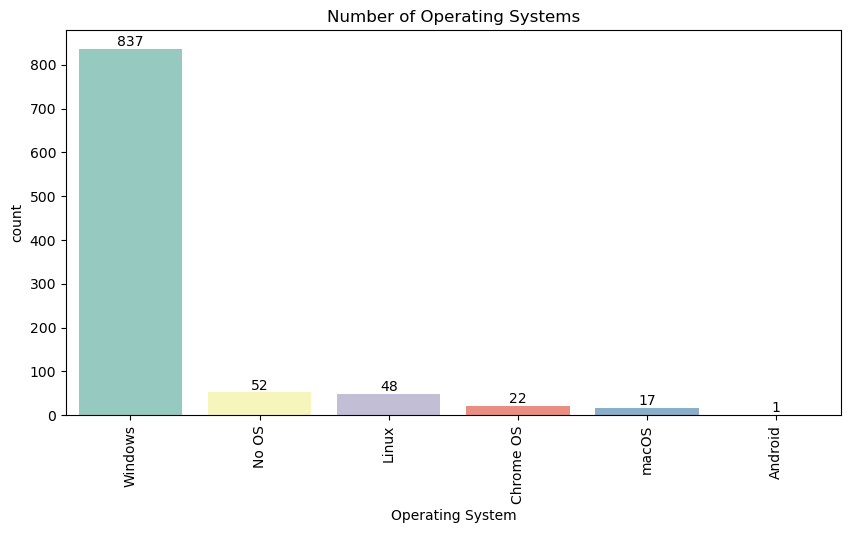

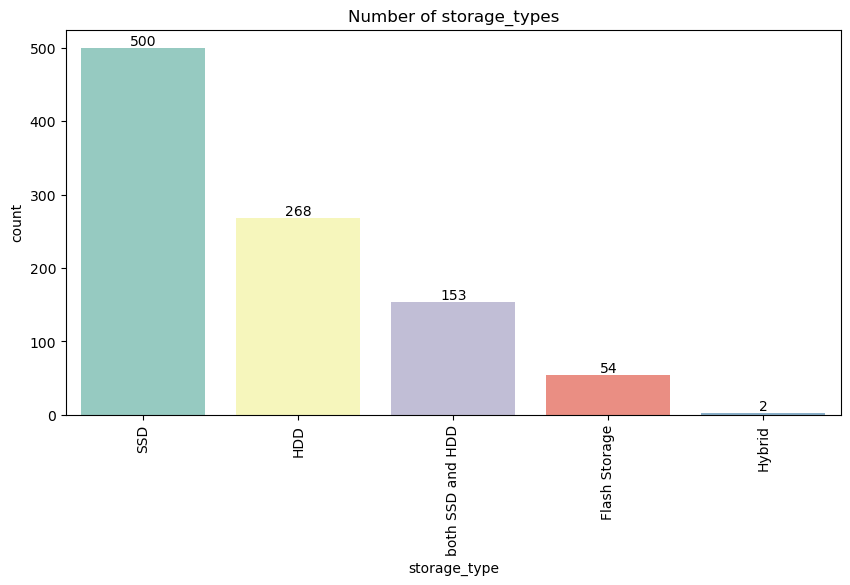

In [73]:


cols=['Manufacturer',"Category", 'cpu_brand','gpu_brand','Operating System','storage_type']
for xx in cols:
    fig, ax  = plt.subplots(figsize = (10,5))
    ax = sns.countplot(x = xx, data = lap2, palette='Set3', order = lap2[xx].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.bar_label(ax.containers[0])
    plt.title(f'Number of {xx}s')
    plt.show()
    





from the above visualization, Dell,Lenovo and HP laptops were the most dominant 
Also, notebook laptops were most frequent too

Intel was the most used GPU and CPU 

Windows was the most used operating system  too

Text(0.5, 1.0, 'Laptop Category  prices based on the number of GPU brand  for Intel')

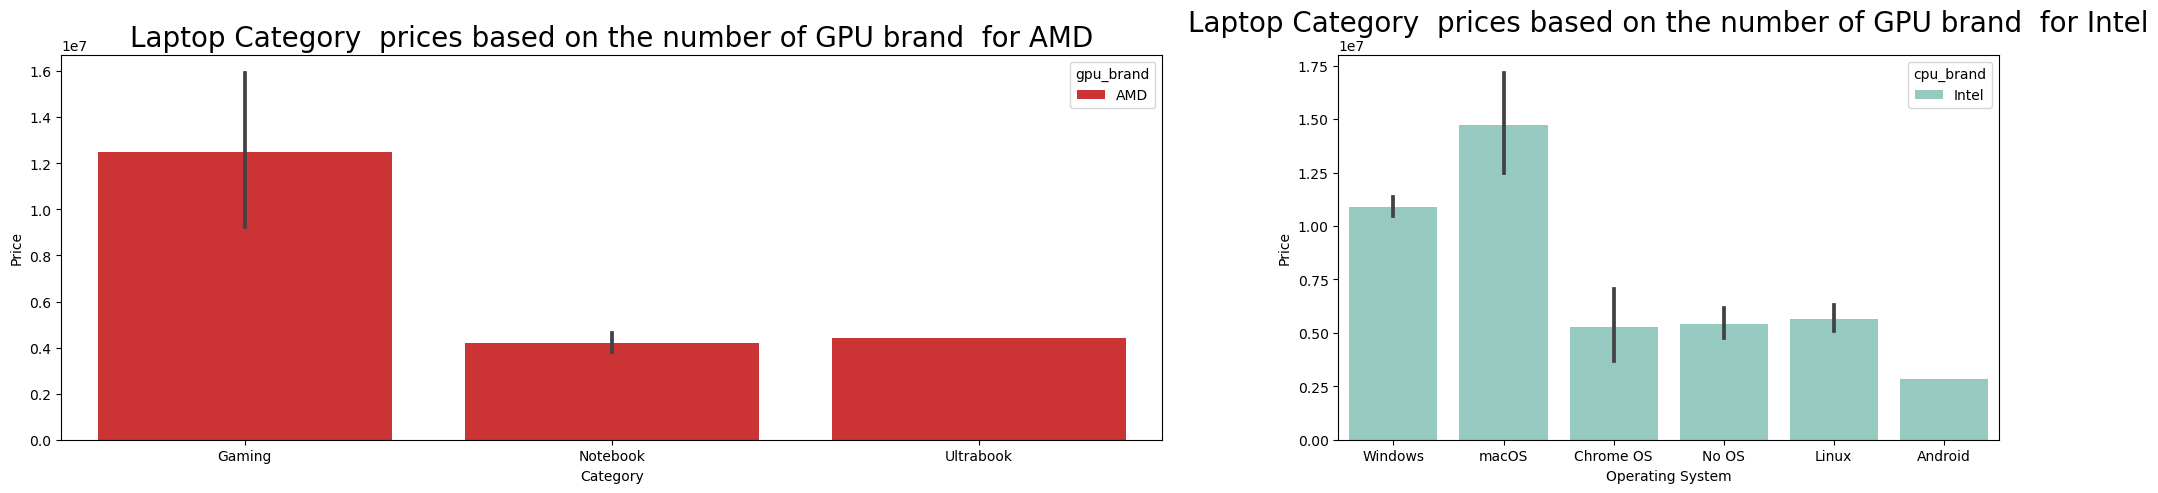

In [30]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.barplot(y = "Price", x = "Category",hue="gpu_brand",data=lap2.loc[lap2["cpu_brand"]=='AMD'].sort_values("Price", ascending = False), ax=axs[0],palette="Set1")
axs[0].set_title("Laptop Category  prices based on the number of GPU brand  for AMD",fontsize=20)
sns.barplot(y = "Price", x = "Operating System",hue="cpu_brand",data = lap2.loc[lap2["cpu_brand"]=='Intel'].sort_values("Price", ascending = False), ax=axs[1],palette="Set3")
axs[1].set_title("Laptop Category  prices based on the number of GPU brand  for Intel",fontsize=20)

# Let's compare numerical columns to Price

In [31]:
lap2.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'CPU',
       'RAM (GB)', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight (kg)', 'Price', 'GPU (new)',
       'storage_type', 'storage_1', 'storage_2', 'resolution', 'screen_type',
       'touchscreen', 'cpu_freq (GHz)', 'cpu_brand', 'gpu_brand'],
      dtype='object')

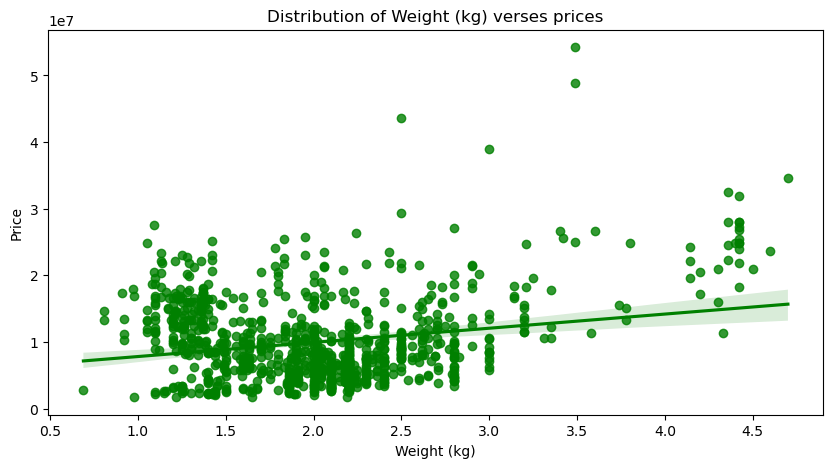

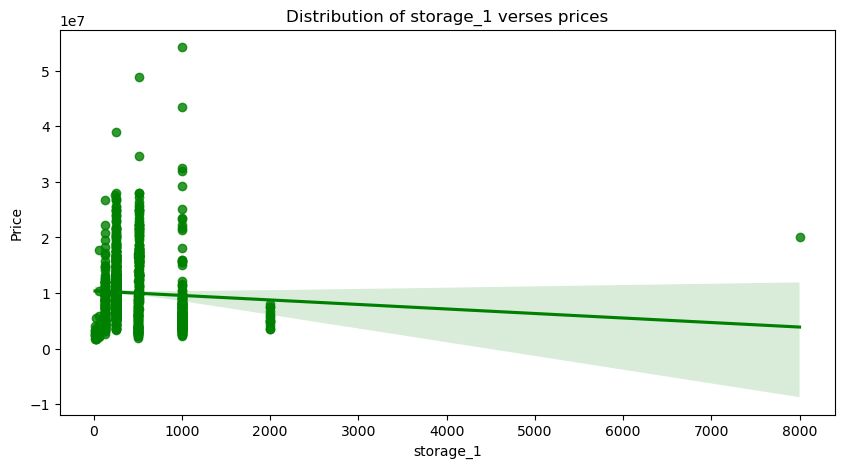

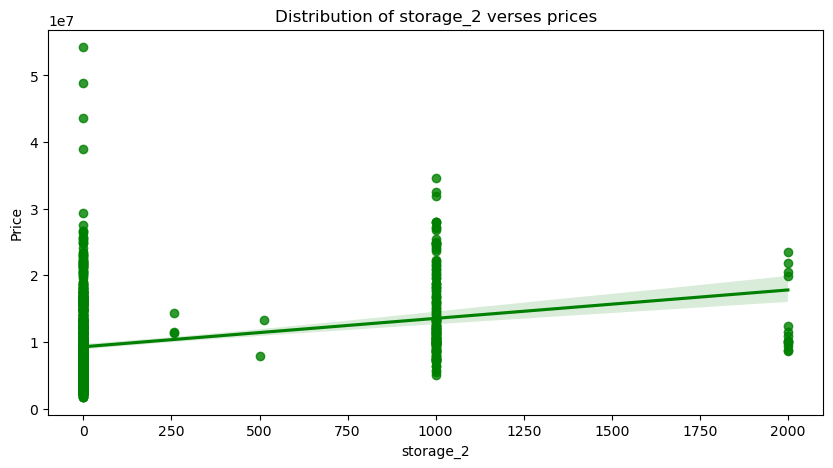

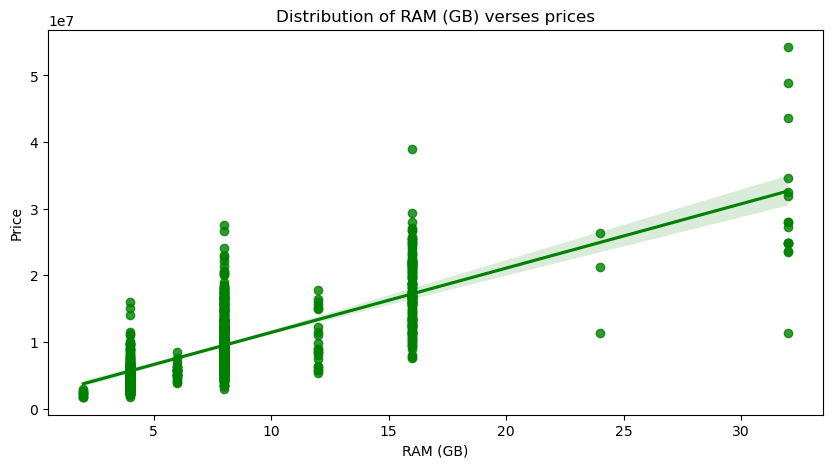

In [72]:
cols=["Weight (kg)",'storage_1', 'storage_2',"RAM (GB)"]
for xx in cols:
    fig, ax  = plt.subplots(figsize = (10,5))
    sns.regplot(x=xx,y="Price",data=lap2,color="g")
    plt.title(f'Distribution of {xx} verses prices')
    




The prices are normally distributed

# Most common Screen Size

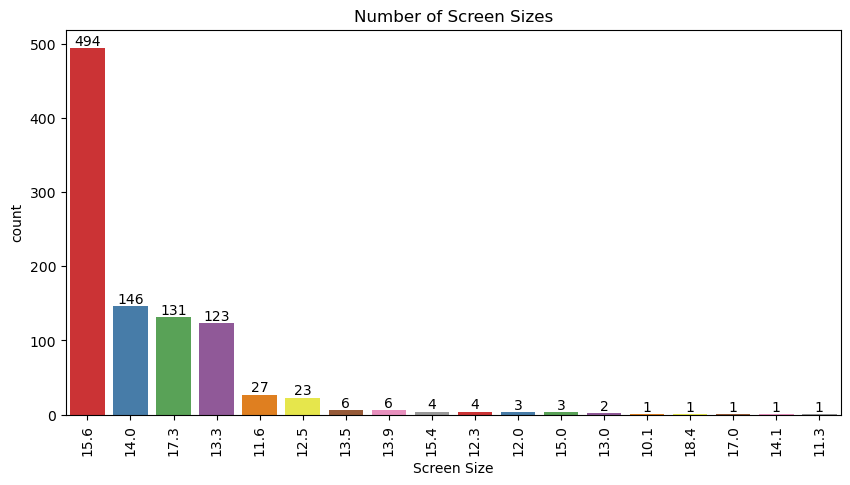

In [74]:
fig, ax  = plt.subplots(figsize = (10,5))
ax = sns.countplot(x ="Screen Size", data = lap2, color='y', order = lap2["Screen Size"].value_counts().index,palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.bar_label(ax.containers[0])
plt.title(f'Number of Screen Sizes')
plt.show()

Majority of the laptops are 15"6 inches

# DISTRIBUTION OF CATEGORICAL FEATURES

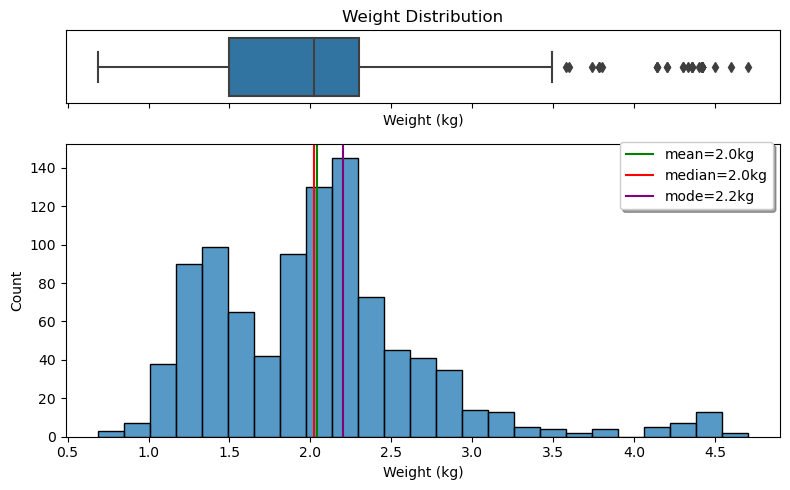

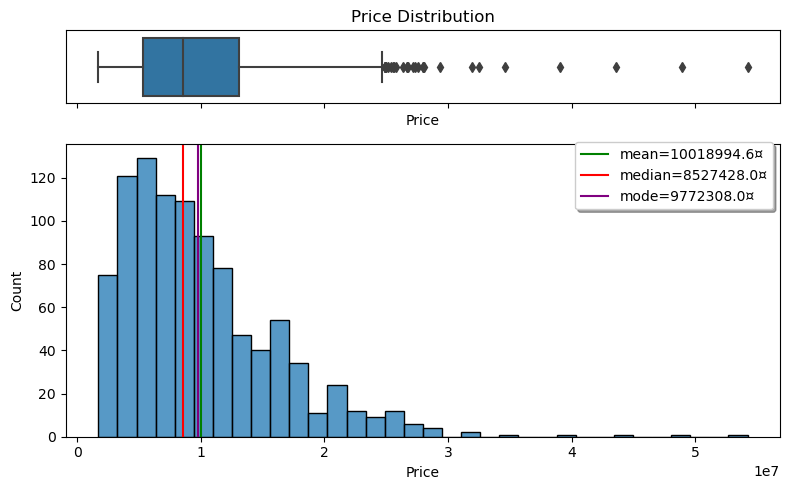

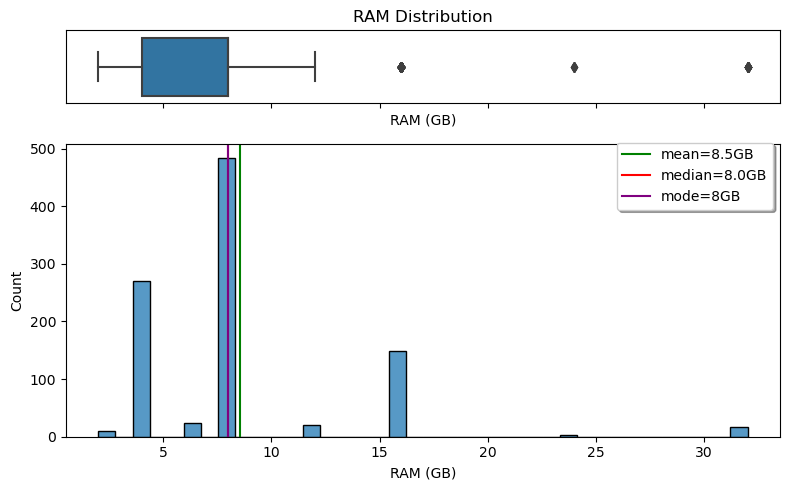

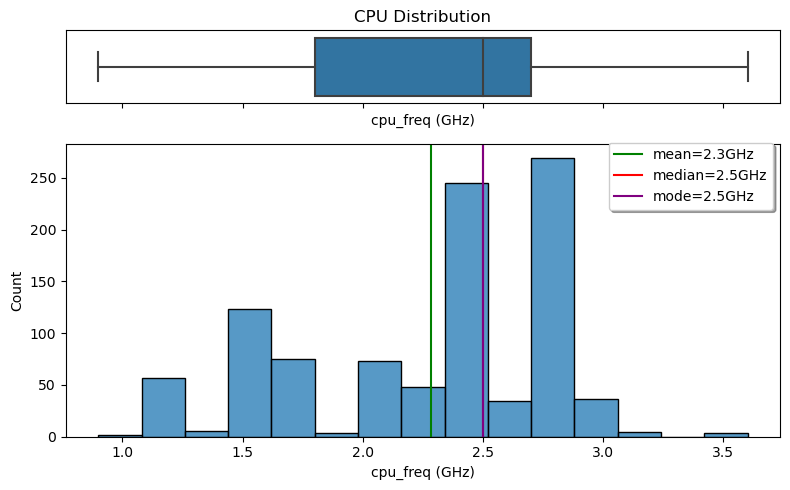

In [34]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex = True, figsize = (8,5),gridspec_kw = {"height_ratios": (.2, .8)})
    ax[0].set_title(title)
    sns.boxplot(x = col, data = df, ax = ax[0])
    ax[0].set(yticks = [])
    sns.histplot(x = col, data = df, ax = ax[1])
    ax[1].set_xlabel(col)
    plt.axvline(df[col].mean(), color = 'g', label = 'mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color = 'red', label = 'median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color = 'purple', label = 'mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor = (1, 1.03), ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.tight_layout()
    plt.show()
num_plot(lap2, 'Weight (kg)', 'Weight Distribution','kg')
num_plot(lap2, 'Price','Price Distribution','¤')
num_plot(lap2, 'RAM (GB)','RAM Distribution','GB')
num_plot(lap2, 'cpu_freq (GHz)','CPU Distribution','GHz')

In [35]:
lap2.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'CPU',
       'RAM (GB)', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight (kg)', 'Price', 'GPU (new)',
       'storage_type', 'storage_1', 'storage_2', 'resolution', 'screen_type',
       'touchscreen', 'cpu_freq (GHz)', 'cpu_brand', 'gpu_brand'],
      dtype='object')

# How are the weights,price ,RAM amd CPU Frequency distributed among the data?

Most Laptops have:

2.2Kg Weight

2.5GHz CPU frequency

8GB RAM



# IMPORTANT INFORMATIONS CAN BE SEEN FROM THE BELOW DIAGRAMS

In [69]:
import plotly.express as px
fig = px.box(lap2, y = 'Price')
fig.show()

In [37]:
import plotly.express as px
fig = px.box(lap2, y = 'Weight (kg)')
fig.show()

In [38]:
lap2.describe()

,RAM (GB),Weight (kg),Price,storage_1,storage_2,touchscreen,cpu_freq (GHz)
count,977.000000,977.000000,9.770000e+02,977.000000,977.000000,977.000000,977.000000
mean,8.528147,2.039128,1.001899e+07,451.643808,173.776868,0.144319,2.284033
std,4.997487,0.666009,6.306430e+06,437.899106,413.903988,0.351593,0.523576
min,2.000000,0.690000,1.706375e+06,16.000000,0.000000,0.000000,0.900000
25%,4.000000,1.500000,5.326308e+06,256.000000,0.000000,0.000000,1.800000
50%,8.000000,2.020000,8.527428e+06,256.000000,0.000000,0.000000,2.500000
75%,8.000000,2.300000,1.311570e+07,512.000000,0.000000,0.000000,2.700000
max,32.000000,4.700000,5.423231e+07,8000.000000,2000.000000,1.000000,3.600000


# Working on the Storages

storage type

Storage 1(slot 1)

storage2(second slot)

total storages

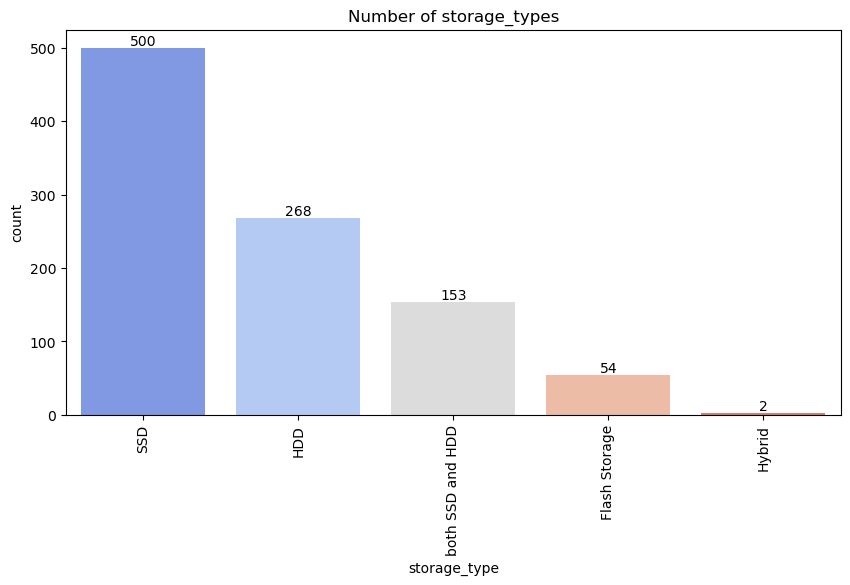

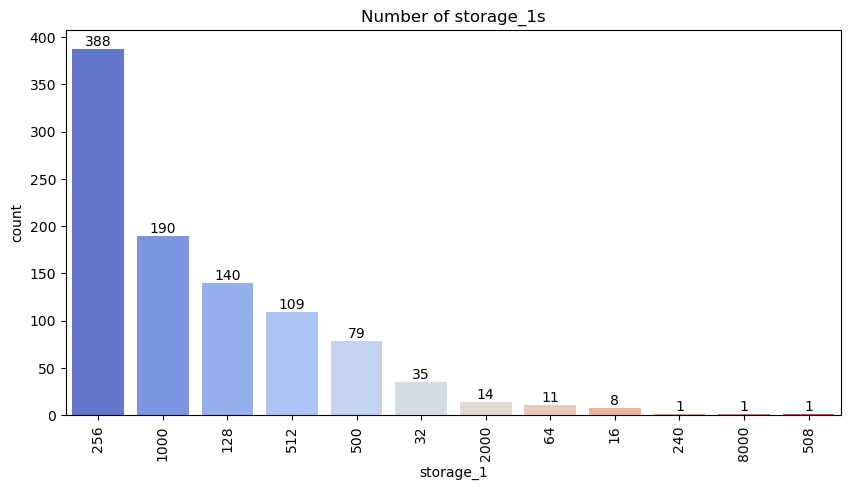

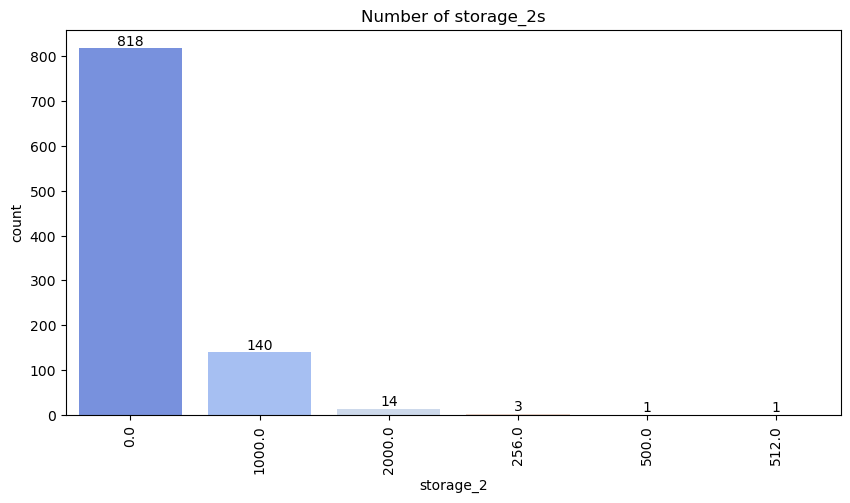

In [76]:
hard_drive=['storage_type', 'storage_1', 'storage_2']
for xx in hard_drive:
    fig, ax  = plt.subplots(figsize = (10,5))
    ax = sns.countplot(x =xx, data = lap2, order = lap2[xx].value_counts().index,palette="coolwarm")
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.bar_label(ax.containers[0])
    plt.title(f'Number of {xx}s')
    plt.show()
    

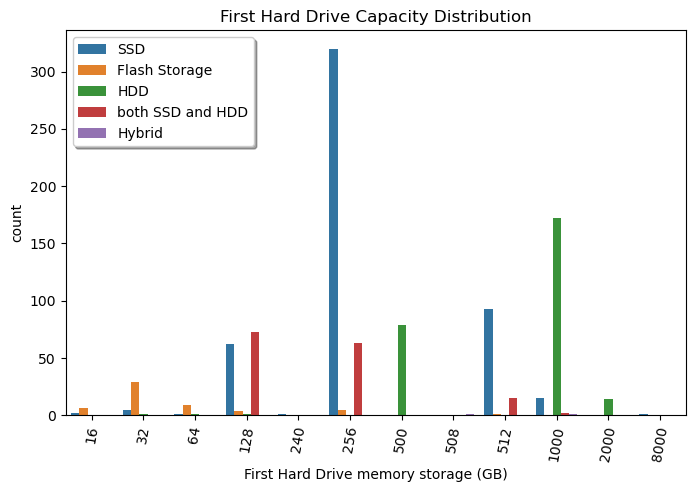

In [40]:
fig, ax  = plt.subplots(figsize=(8,5))
ax = sns.countplot(x = 'storage_1', data = lap2, hue = 'storage_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.set_xlabel('First Hard Drive memory storage (GB)')
plt.title('First Hard Drive Capacity Distribution')
plt.legend(loc = 'upper left', ncol = 1, fancybox = True, shadow = True, frameon = True)
plt.show()

Most frquent Storage in use is the SSD

256GB is the most prefered first storage slot size

1TB is the most prefered second storage slot size




# Comparing two features

In [41]:
def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df[col_y])
    sns.regplot(x = col_x, y = col_y, data = df, color='#0d98ba', line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc = leg, ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.title(col_y + ' VS ' + col_x)
    plt.show()

    return slope, intercept

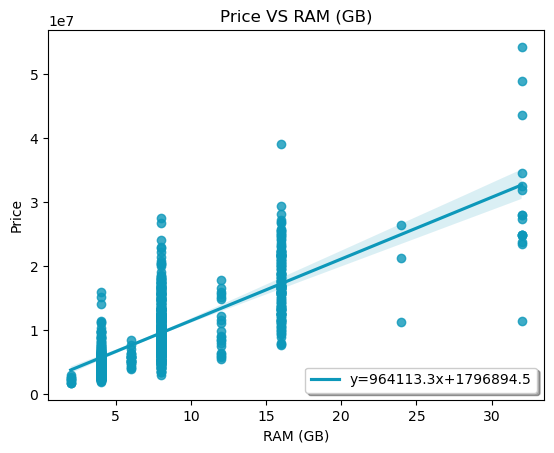

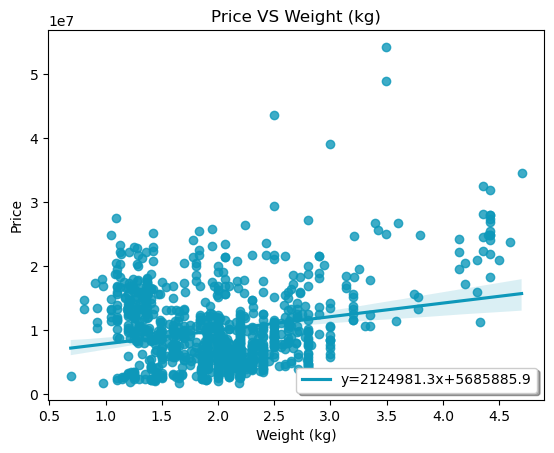

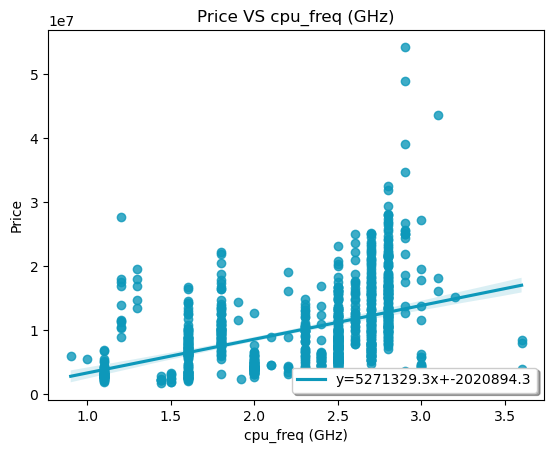

In [42]:
slope, intercept = lr_plot(lap2,'RAM (GB)','Price', 'lower right')
slope, intercept = lr_plot(lap2,'Weight (kg)','Price', 'lower right')
#slope, intercept = lr_plot(lap2,'total_storage','Price', 'lower right')
slope, intercept = lr_plot(lap2,'cpu_freq (GHz)','Price', 'lower right')

An increase in RAM size also causes an increase in Laptop price

Most prices of various laptops are concentrated around the mean

We can see a positive trend in the CPU Frequency

Screen size also affects Prices significantly

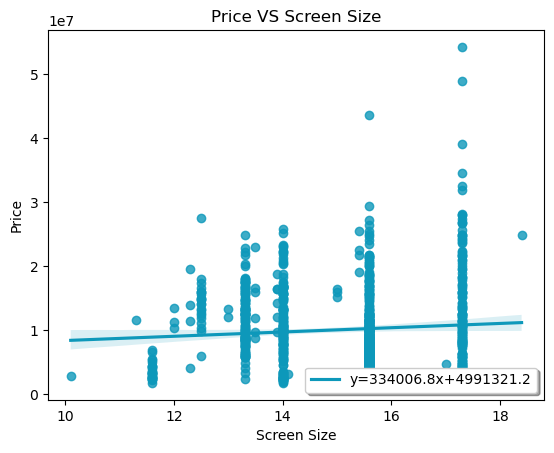

In [43]:
lap2["Screen Size"]=lap2["Screen Size"].apply(lambda x:x[0:-1])
lap2["Screen Size"]=lap2["Screen Size"].apply(lambda x: float(x))
#lap2["Screen Size"]


lap1["Screen Size"]=lap1["Screen Size"].apply(lambda x:x[0:-1])
lap1["Screen Size"]=lap1["Screen Size"].apply(lambda x: float(x))
#lap2["Screen Size"]



slope, intercept = lr_plot(lap2,'Screen Size','Price', 'lower right')


The regression line is almost flat, meaning that PCs with higher screen inches slightly tends to be more expensive.

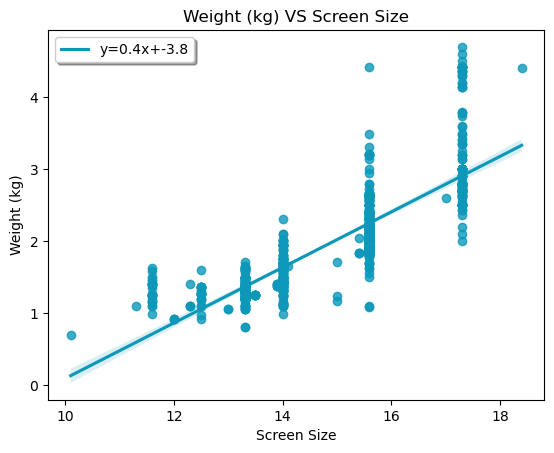

In [44]:
slope, intercept = lr_plot(lap2, 'Screen Size', 'Weight (kg)', 'upper left')

Laptops with higher screen size are heavy as well

# Which are the TOP 15 most common GPUs?

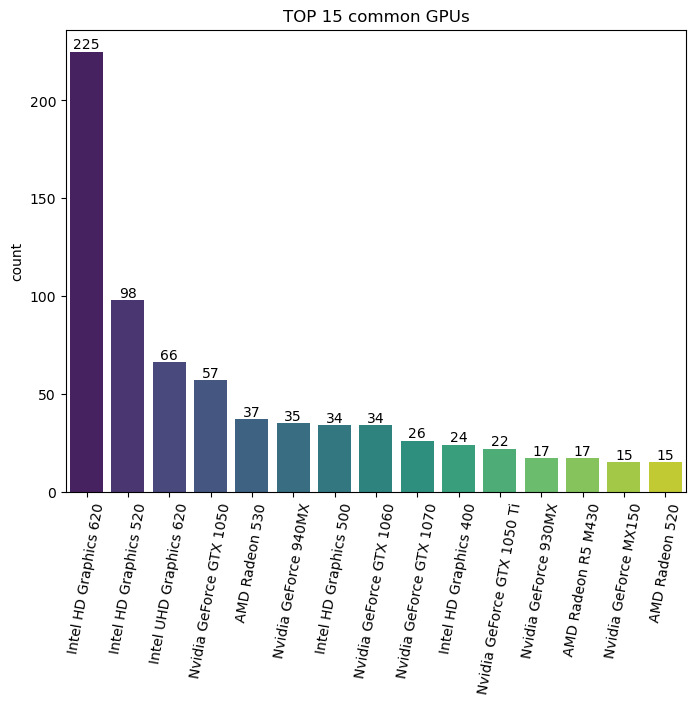

In [77]:
gpu_list = lap2['GPU'].value_counts()[:15].index.tolist()
plt.figure(figsize = (8,6))
ax=sns.countplot(x = 'GPU', data = lap2[lap2['GPU'].isin(gpu_list)], order = gpu_list, palette = 'viridis')
plt.xticks(rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('TOP 15 common GPUs')
plt.xlabel('')
plt.show()




# Which are the TOP 15 most common CPUs?

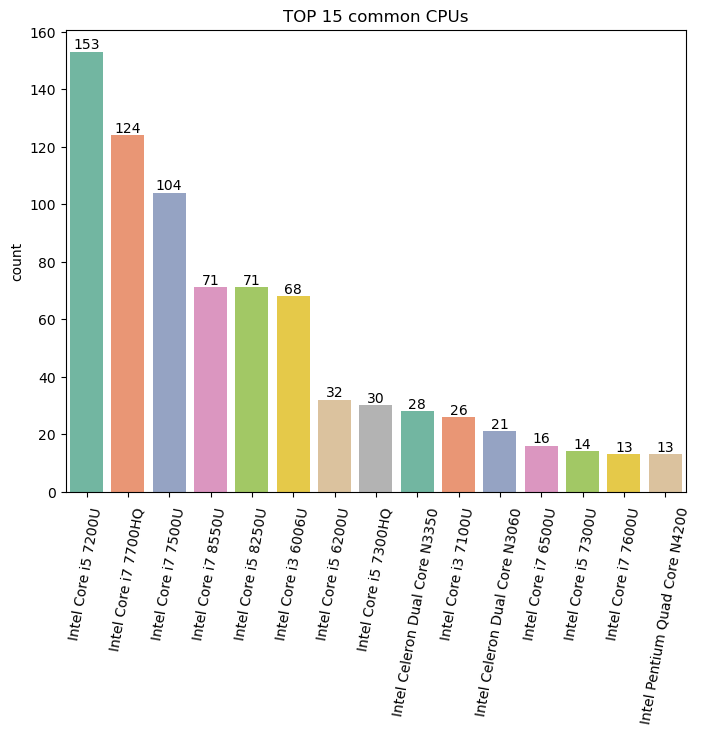

In [78]:
cpu_list = lap2['CPU'].value_counts()[:15].index.tolist()
plt.figure(figsize = (8,6))
ax = sns.countplot(x = 'CPU', data = lap2[lap2['CPU'].isin(cpu_list)], order = cpu_list, palette = 'Set2')
plt.xticks(rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('TOP 15 common CPUs')
plt.xlabel('')
plt.show()

# Price VS CPU brand by GPU brand

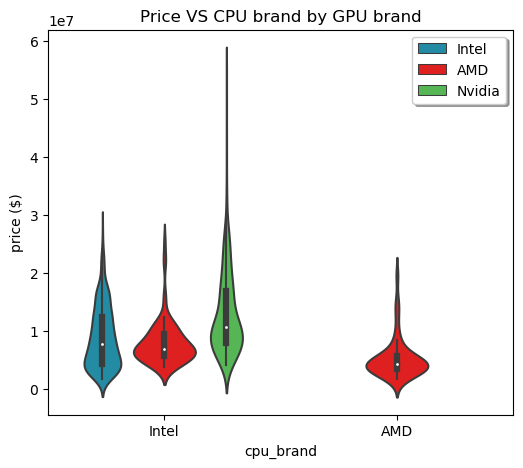

In [47]:
cpu_palette = {'Intel':'#0d98ba', 'AMD':'#FF0000', 'Nvidia':'#46C646'}
fig, ax = plt.subplots(figsize = (6,5))
sns.violinplot(x = 'cpu_brand', y = 'Price', data = lap2, hue = 'gpu_brand', palette = cpu_palette)
ax.set_title('Price vs CPU brand by GPU brand')
plt.ylabel('price ($)')
plt.legend(loc = 'upper right', ncol=1, fancybox = True, shadow = True, frameon = True)
plt.title('Price VS CPU brand by GPU brand')
plt.show()

Insights from this plot:

Laptops with Intel CPUs are more expensive.

Laptops with an AMD CPUs also hahave and AMD GPUs

Laptops with Nvidia GPUs are more expensive.

# What is the average price of laptops by company?


As seen previously, there are some companies which have just few laptops in the dataset:

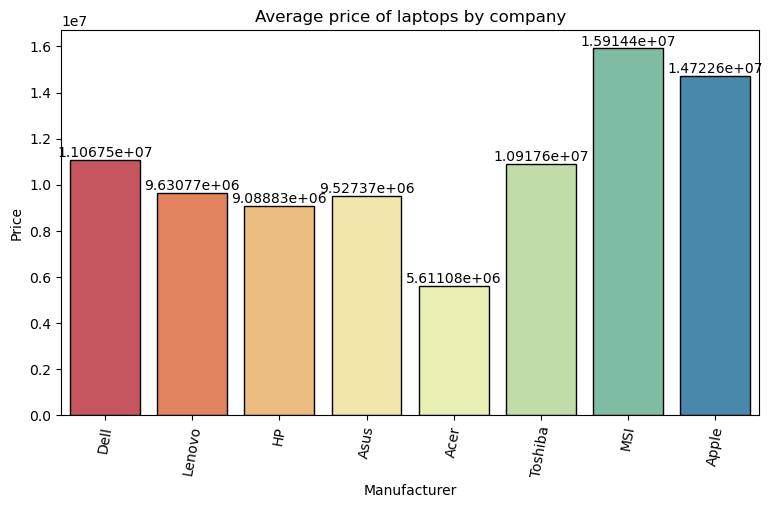

In [48]:
lap2['Manufacturer'].value_counts()
company_list = lap2['Manufacturer'].value_counts().index[:8].tolist()


plt.figure(figsize = (9,5))
ax=sns.barplot(x = 'Manufacturer', y = 'Price', data = lap2[lap2['Manufacturer'].isin(company_list)],
                order = company_list, 
                palette = 'Spectral', 
                ci = False,
                edgecolor = "black")
plt.xticks(rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('Average price of laptops by company')
plt.show()

•	MSI laptops are on average the most expensive.

•	Apple laptops are the second most expensive laptops and Toshiba's are 3rd.

•	Acer are the cheapest, with an average price of 626$

•	Laptops from Dell, Lenovo, HP and Asus have, on average


In [49]:
lap3=lap2.copy()

# Data preparation for ML modeling

# Categorical features encoding

In [50]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


The categorical columns ('company','product','typename','cpu','gpu','opsys','resolution','screentype','resolution','memory_1_type','memory_2_type','gpu_brand','cpu_brand') will be now encoded.
An encoding by one hot encoding would be preferrable in this case since there is not a order/hierarchy among the different categories for each variable, but this would lead to a very high number of columns (around 900), which is close to the number of total rows (1000).
So, if we had more data a OHE encoding would be preferrable, but in case a Label Encoding will be performed to keep the number of features lower.

In [51]:
lap3.drop([" Storage","GPU (new)","Operating System Version"],axis=1,inplace=True)
lap1.drop([" Storage","GPU (new)","Operating System Version"],axis=1,inplace=True)
lap3.head()

,Manufacturer,Model Name,Category,Screen Size,CPU,RAM (GB),GPU,Operating System,Weight (kg),Price,storage_type,storage_1,storage_2,resolution,screen_type,touchscreen,cpu_freq (GHz),cpu_brand,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,11912523.48,SSD,128,0.0,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,7993374.48,Flash Storage,128,0.0,1440x900,NaN,0.0,1.8,Intel,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86,5112900.00,SSD,256,0.0,1920x1080,NaN,0.0,2.5,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,22563005.40,SSD,512,0.0,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,16037611.20,SSD,256,0.0,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,Intel,Intel


In [52]:
cat_cols =  ['Manufacturer', 'Model Name', 'Category', 'CPU', 'GPU', 'Operating System',
             'resolution', 'screen_type', 'storage_1', 'storage_2',
             'gpu_brand', 'cpu_brand',"storage_type"]

In [53]:
#One hot encoding
print('Dataframe encoded by OHE dimension : ', pd.get_dummies(lap3, columns = cat_cols, drop_first = True).shape)
#One hot encoding
print('Dataframe encoded by OHE dimension : ', pd.get_dummies(lap1, columns = cat_cols, drop_first = True).shape)

Dataframe encoded by OHE dimension :  (977, 740)
Dataframe encoded by OHE dimension :  (297, 347)


In [54]:
#Label encoding
en = LabelEncoder()

for cols in cat_cols:
    lap3[cols] = en.fit_transform(lap3[cols])
    lap1[cols] = en.fit_transform(lap1[cols])

for cols in cat_cols:
    lap3[cols] = en.fit_transform(lap3[cols])
    lap1[cols] = en.fit_transform(lap1[cols])

print('Dataframe encoded by Label encoding dimension : ', lap3.shape)

Dataframe encoded by Label encoding dimension :  (977, 19)


In [55]:
x=lap3.drop("Price",axis=1)
y=lap3["Price"]


x1=lap1.drop("Price",axis=1)
y1=lap1["Price"]

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import Lars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.experimental import enable_hist_gradient_boosting
    
    
linear=LinearRegression()
alpha = 1.0  # Regularization strength
ridge_model = Ridge(alpha=alpha)
alpha = 0.1  # Regularization strength
lasso_model = Lasso(alpha=alpha)
bayesian_ridge = BayesianRidge()
ard_regression = ARDRegression()
lars = Lars()
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=5) 
passive_aggressive_regressor = PassiveAggressiveRegressor(C=1.0, max_iter=1000, random_state=42)
dt_regressor = DecisionTreeRegressor(random_state=0)
ran=RandomForestRegressor(n_estimators=20)

gradient=GradientBoostingRegressor(learning_rate=0.1,n_estimators=10)
hist=HistGradientBoostingRegressor(learning_rate=0.1,l2_regularization=0.1)
ada=AdaBoostRegressor(n_estimators=10,learning_rate=0.2,random_state=40)
knn=KNeighborsRegressor(n_neighbors=10)
el=ElasticNet(alpha=0.1)

These are the accuracy scores for the Testing data  

 For Linear Regression Algorithm, we had an accuracy of 64.0965212035756
 For  Ridge Algorithm, we had an accuracy of 65.5609204576791
 For Lasso Regression Algorithm, we had an accuracy of 64.09652878936643
 For Bayesian Algorithm, we had an accuracy of -1.6879787134120638
 For ARDRegression Algorithm, we had an accuracy of -1.6879787134121527
 For Lars Algorithm, we had an accuracy of -97.77896372408802
 For  Orthogonal Matching Pursuit Algorithm, we had an accuracy of 58.16999435091079
 For Passive Aggression Regressor Algorithm, we had an accuracy of -129.00930939749622
 For Decision TreeRegressor Algorithm, we had an accuracy of 62.91160035212957
 For Random Forest Regressor Algorithm, we had an accuracy of 75.7791865137475
 For Gradient Boost Regressor Algorithm, we had an accuracy of 59.60859658603903
 For Hist Regressor Algorithm, we had an accuracy of 81.96514217447971
 For Adaboost Forest Regressor Algorithm, we had an acc

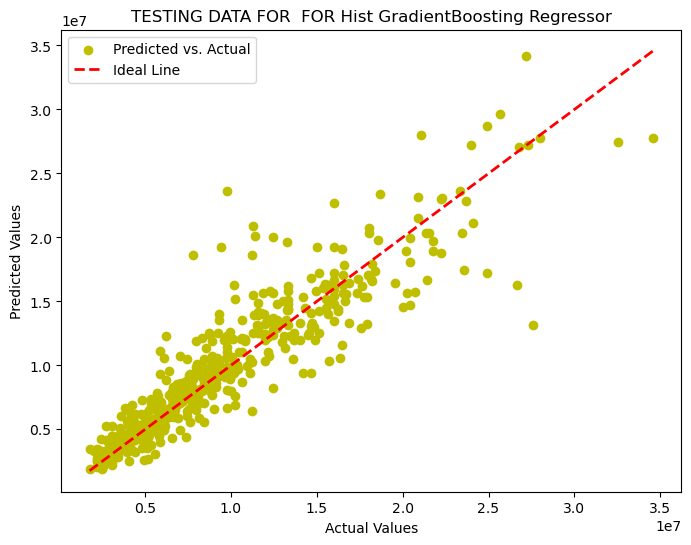

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.5)

standard=MinMaxScaler()
x_train_new=standard.fit_transform(x_train)
x_test_new=standard.transform(x_test)

def get_score(model):
    model.fit(x_train_new,y_train)
    pred=model.predict(x_test_new)
    score=model.score(x_test_new,y_test)
    return score*100

print("These are the accuracy scores for the Testing data  \n")
print(f' For Linear Regression Algorithm, we had an accuracy of {get_score(linear)}')
print(f' For  Ridge Algorithm, we had an accuracy of {get_score(ridge_model)}')
print(f' For Lasso Regression Algorithm, we had an accuracy of {get_score(lasso_model)}')
print(f' For Bayesian Algorithm, we had an accuracy of {get_score(bayesian_ridge)}')
print(f' For ARDRegression Algorithm, we had an accuracy of {get_score(ard_regression)}')
print(f' For Lars Algorithm, we had an accuracy of {get_score(lars)}')
print(f' For  Orthogonal Matching Pursuit Algorithm, we had an accuracy of {get_score(omp)}')
print(f' For Passive Aggression Regressor Algorithm, we had an accuracy of {get_score(passive_aggressive_regressor)}')
print(f' For Decision TreeRegressor Algorithm, we had an accuracy of {get_score(dt_regressor)}')
print(f' For Random Forest Regressor Algorithm, we had an accuracy of {get_score(ran)}')


print(f' For Gradient Boost Regressor Algorithm, we had an accuracy of {get_score(gradient)}')
print(f' For Hist Regressor Algorithm, we had an accuracy of {get_score(hist)}')
print(f' For Adaboost Forest Regressor Algorithm, we had an accuracy of {get_score(ada)}')
print(f' For KNN Regressor Algorithm, we had an accuracy of {get_score(knn)}')
print(f' For Elastic Net Algorithm, we had an accuracy of {get_score(el)}')







xx=hist.predict(x_test_new)


# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test,xx, color='y', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')
# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("TESTING DATA FOR  FOR Hist GradientBoosting Regressor")
plt.legend()


# FEATURE SELECTION AND HYPERPARAMETER TUNING FOR RANDOM FOREST

0.8333361198715499
SELECTED FEATURES FOR OUR MODEL INCLUDES Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'CPU',
       'RAM (GB)', 'GPU', 'Operating System', 'Weight (kg)', 'storage_type',
       'storage_1', 'resolution', 'screen_type', 'touchscreen',
       'cpu_freq (GHz)'],
      dtype='object')


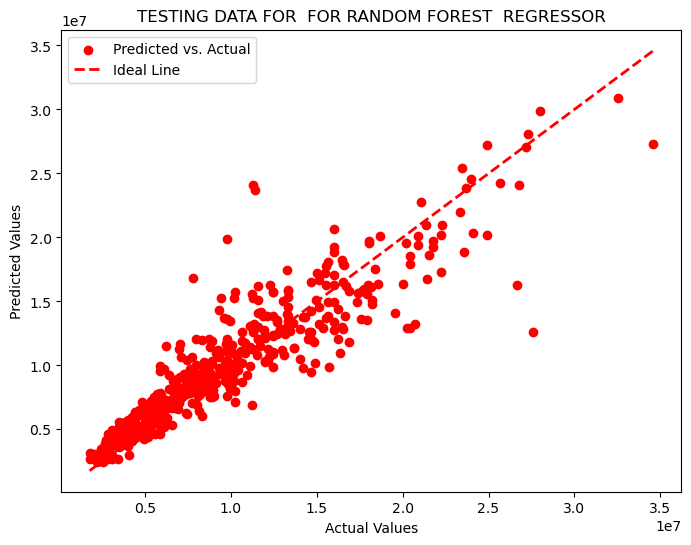

In [58]:
rfe = RFE(estimator=ran, n_features_to_select=15, step=5)
rfe = rfe.fit(x_train_new,y_train)
selected_features2 = x.columns[rfe.support_]
ran=RandomForestRegressor(random_state= 500,
 n_estimators= 1000,
 min_samples_split= 1,
 min_samples_leaf= 1,
 max_features='sqrt',
 max_depth =250,
 criterion= 'squared_error')

ran.fit(x_train_new,y_train)
pred=ran.predict(x_test_new)
score=ran.score(x_test_new,y_test)
print(score)
print(f'SELECTED FEATURES FOR OUR MODEL INCLUDES {selected_features2}')


plt.figure(figsize=(8, 6))
plt.scatter(y_test,pred, color='r', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')
# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("TESTING DATA FOR  FOR RANDOM FOREST  REGRESSOR")
plt.legend()


# HYPERPARAMETER TUNING FOR HIST REGRESSOR 

0.8302253762594732


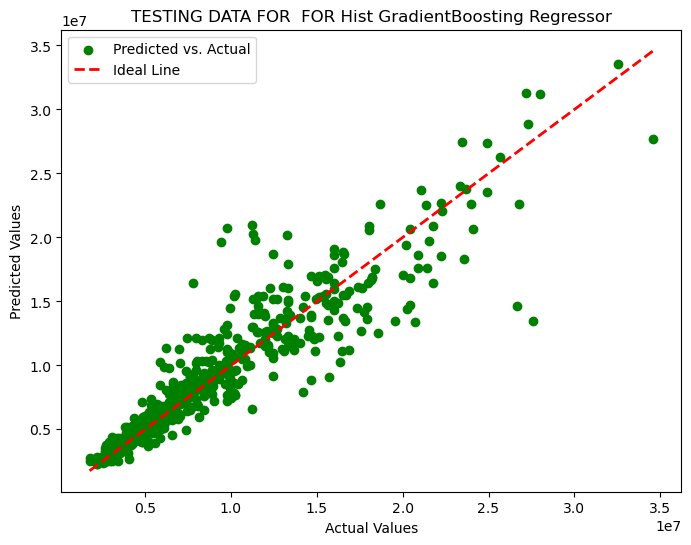

In [59]:

hist=HistGradientBoostingRegressor(quantile= 0.5,
 min_samples_leaf=4,
 max_leaf_nodes=20,
 max_iter= 100,
 max_depth= 500,
 max_bins=50,
 loss='poisson',
 learning_rate=0.1,
 l2_regularization=0.9)

hist.fit(x_train_new,y_train)
pred=hist.predict(x_test_new)
score=hist.score(x_test_new,y_test)
print(score)


plt.figure(figsize=(8, 6))
plt.scatter(y_test,pred, color='g', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')
# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("TESTING DATA FOR  FOR Hist GradientBoosting Regressor")
plt.legend()


# lightgbm Regressor

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 413
[LightGBM] [Info] Number of data points in the train set: 488, number of used features: 18
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 10392968.514344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

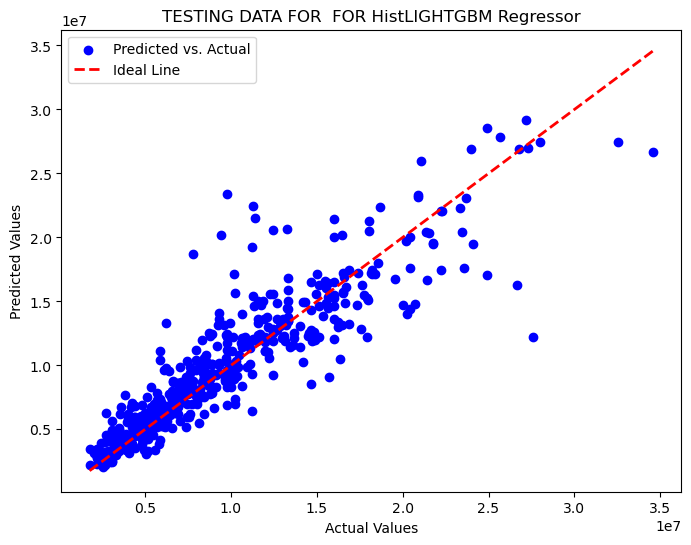

In [60]:
import lightgbm as lgb
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test, reference=train_data)
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
}

num_round = 100  # Number of boosting rounds

model = lgb.train(params, train_data, num_round, valid_sets=[test_data], early_stopping_rounds=10, verbose_eval=10)
y_pred = model.predict(x_test, num_iteration=model.best_iteration)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred, color='b', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')
# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("TESTING DATA FOR  FOR HistLIGHTGBM Regressor")
plt.legend()

# CATBOOST

0:	learn: 5999172.2747079	total: 166ms	remaining: 2m 45s
1:	learn: 5674594.9022889	total: 171ms	remaining: 1m 25s
2:	learn: 5372252.6806340	total: 177ms	remaining: 58.8s
3:	learn: 5080498.8752183	total: 180ms	remaining: 44.9s
4:	learn: 4842461.8561276	total: 184ms	remaining: 36.6s
5:	learn: 4650979.6637112	total: 187ms	remaining: 31s
6:	learn: 4454282.0385608	total: 191ms	remaining: 27.1s
7:	learn: 4253712.8951845	total: 194ms	remaining: 24.1s
8:	learn: 4087274.1823724	total: 197ms	remaining: 21.7s
9:	learn: 3910143.3556855	total: 201ms	remaining: 19.9s
10:	learn: 3766436.9005931	total: 204ms	remaining: 18.3s
11:	learn: 3637897.2149559	total: 207ms	remaining: 17.1s
12:	learn: 3535606.9814040	total: 211ms	remaining: 16s
13:	learn: 3432362.6453063	total: 214ms	remaining: 15.1s
14:	learn: 3334019.1103305	total: 217ms	remaining: 14.3s
15:	learn: 3239677.0974220	total: 221ms	remaining: 13.6s
16:	learn: 3154728.3264491	total: 225ms	remaining: 13s
17:	learn: 3072968.7216439	total: 228ms	remai

201:	learn: 1025333.2276235	total: 558ms	remaining: 2.2s
202:	learn: 1023541.0420336	total: 560ms	remaining: 2.2s
203:	learn: 1017275.6299607	total: 562ms	remaining: 2.19s
204:	learn: 1013310.5056504	total: 563ms	remaining: 2.18s
205:	learn: 1008383.2488619	total: 565ms	remaining: 2.18s
206:	learn: 1007778.1914803	total: 566ms	remaining: 2.17s
207:	learn: 1005101.2050623	total: 568ms	remaining: 2.16s
208:	learn: 1003417.5284758	total: 569ms	remaining: 2.15s
209:	learn: 1000606.1637548	total: 571ms	remaining: 2.15s
210:	learn: 996054.1514810	total: 572ms	remaining: 2.14s
211:	learn: 991682.9264231	total: 574ms	remaining: 2.13s
212:	learn: 991210.5289356	total: 575ms	remaining: 2.12s
213:	learn: 987268.2616316	total: 576ms	remaining: 2.12s
214:	learn: 983074.4819711	total: 577ms	remaining: 2.11s
215:	learn: 981374.9412256	total: 579ms	remaining: 2.1s
216:	learn: 978206.9765201	total: 580ms	remaining: 2.09s
217:	learn: 976628.1688287	total: 581ms	remaining: 2.08s
218:	learn: 973545.099461

427:	learn: 627333.0921191	total: 935ms	remaining: 1.25s
428:	learn: 626365.9634515	total: 938ms	remaining: 1.25s
429:	learn: 625144.7611350	total: 940ms	remaining: 1.25s
430:	learn: 623952.9540794	total: 942ms	remaining: 1.24s
431:	learn: 622989.0578608	total: 945ms	remaining: 1.24s
432:	learn: 622577.6324497	total: 947ms	remaining: 1.24s
433:	learn: 621781.6925205	total: 948ms	remaining: 1.24s
434:	learn: 620320.3359015	total: 950ms	remaining: 1.23s
435:	learn: 619310.7129747	total: 952ms	remaining: 1.23s
436:	learn: 618703.4311064	total: 954ms	remaining: 1.23s
437:	learn: 617492.9044480	total: 955ms	remaining: 1.23s
438:	learn: 616828.2581697	total: 957ms	remaining: 1.22s
439:	learn: 616312.0994171	total: 958ms	remaining: 1.22s
440:	learn: 615909.1943782	total: 960ms	remaining: 1.22s
441:	learn: 613977.4026794	total: 961ms	remaining: 1.21s
442:	learn: 612989.1147642	total: 964ms	remaining: 1.21s
443:	learn: 612504.9411691	total: 966ms	remaining: 1.21s
444:	learn: 612111.3049191	tota

648:	learn: 452512.7593911	total: 1.32s	remaining: 712ms
649:	learn: 452184.8433750	total: 1.32s	remaining: 710ms
650:	learn: 450782.3737586	total: 1.32s	remaining: 708ms
651:	learn: 450028.3193435	total: 1.32s	remaining: 706ms
652:	learn: 449841.6904522	total: 1.32s	remaining: 704ms
653:	learn: 449218.0629745	total: 1.32s	remaining: 701ms
654:	learn: 449135.6819251	total: 1.33s	remaining: 699ms
655:	learn: 448659.6737926	total: 1.33s	remaining: 696ms
656:	learn: 447792.9986927	total: 1.33s	remaining: 694ms
657:	learn: 447298.2636551	total: 1.33s	remaining: 692ms
658:	learn: 447189.9986366	total: 1.33s	remaining: 689ms
659:	learn: 447110.0217357	total: 1.33s	remaining: 687ms
660:	learn: 446843.7025413	total: 1.33s	remaining: 684ms
661:	learn: 446094.1697261	total: 1.33s	remaining: 682ms
662:	learn: 445675.6225635	total: 1.34s	remaining: 680ms
663:	learn: 444962.5663572	total: 1.34s	remaining: 678ms
664:	learn: 444921.6905725	total: 1.34s	remaining: 675ms
665:	learn: 443906.4620799	tota

870:	learn: 357509.1495411	total: 1.7s	remaining: 252ms
871:	learn: 357285.9423227	total: 1.7s	remaining: 250ms
872:	learn: 357052.9102962	total: 1.7s	remaining: 248ms
873:	learn: 356906.7379834	total: 1.71s	remaining: 246ms
874:	learn: 356724.0732540	total: 1.71s	remaining: 244ms
875:	learn: 356170.1369215	total: 1.71s	remaining: 242ms
876:	learn: 355801.4932972	total: 1.71s	remaining: 240ms
877:	learn: 355674.9487789	total: 1.71s	remaining: 238ms
878:	learn: 355326.5267438	total: 1.71s	remaining: 236ms
879:	learn: 355216.0912904	total: 1.71s	remaining: 234ms
880:	learn: 354953.9245254	total: 1.72s	remaining: 232ms
881:	learn: 354915.4242476	total: 1.72s	remaining: 230ms
882:	learn: 354447.0724506	total: 1.72s	remaining: 228ms
883:	learn: 354147.1389010	total: 1.72s	remaining: 226ms
884:	learn: 354039.9486102	total: 1.72s	remaining: 224ms
885:	learn: 353853.3640189	total: 1.72s	remaining: 222ms
886:	learn: 353763.1462447	total: 1.72s	remaining: 220ms
887:	learn: 353518.3573400	total: 

0.8811145461567207

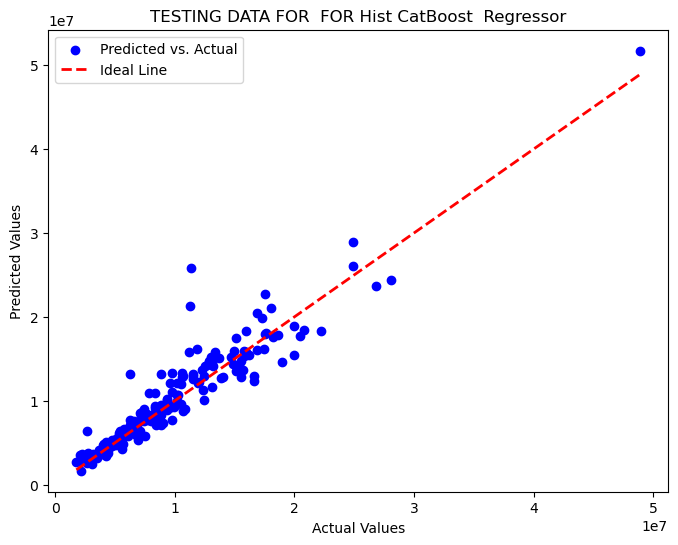

In [61]:
import catboost
from catboost import CatBoostRegressor
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train=standard.fit_transform(x_train) 
x_test=standard.transform(x_test)
model = CatBoostRegressor(iterations=1000,  # Number of boosting iterations
                         learning_rate=0.1,  # Step size shrinking to prevent overfitting
                         depth=6,  # Depth of the decision tree
                         loss_function='RMSE')  # Regression loss function

model.fit(x_train, y_train)


y_pred = model.predict(x_test)
score=model.score(x_test,y_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred, color='b', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')
# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("TESTING DATA FOR  FOR Hist CatBoost  Regressor")
plt.legend()
score

We can see that Catboost did the job well than other models with an accuracy score of 88%

# OUTLIER REMOVAL

We can further improve the score through hyperparameter tuning and fearture selection also

In [62]:
lap3

,Manufacturer,Model Name,Category,Screen Size,CPU,RAM (GB),GPU,Operating System,Weight (kg),Price,storage_type,storage_1,storage_2,resolution,screen_type,touchscreen,cpu_freq (GHz),cpu_brand,gpu_brand
0,1,236,4,13.3,46,8,51,5,1.37,11912523.48,3,3,0,10,1,0.0,2.3,1,1
1,1,237,4,13.3,46,8,45,5,1.34,7993374.48,0,3,0,1,2,0.0,1.8,1,1
2,7,38,3,15.6,52,8,47,3,1.86,5112900.00,3,5,0,3,2,0.0,2.5,1,1
3,1,236,4,15.4,60,16,7,5,1.83,22563005.40,3,8,0,12,1,0.0,2.7,1,0
4,1,236,4,13.3,46,8,52,5,1.37,16037611.20,3,5,0,10,1,0.0,3.1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,4,43,1,17.3,64,32,72,4,4.42,24897600.00,4,5,4,3,2,0.0,2.6,1,2
973,16,339,3,14.0,47,8,41,4,1.95,10492560.00,3,5,0,3,2,0.0,2.3,1,1
974,2,318,1,17.3,72,16,71,4,2.73,18227710.80,4,5,4,3,2,0.0,2.8,1,2
975,7,293,3,15.6,52,8,62,4,2.04,8705268.00,4,3,4,3,0,0.0,2.7,1,2


In [63]:
Q1 = np.percentile(lap3['Price'], 25)
Q3 = np.percentile(lap3['Price'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = lap3[(lap3['Price'] >= lower_bound) & (lap3['Price'] <= upper_bound)]


df.head()



,Manufacturer,Model Name,Category,Screen Size,CPU,RAM (GB),GPU,Operating System,Weight (kg),Price,storage_type,storage_1,storage_2,resolution,screen_type,touchscreen,cpu_freq (GHz),cpu_brand,gpu_brand
0,1,236,4,13.3,46,8,51,5,1.37,11912523.48,3,3,0,10,1,0.0,2.3,1,1
1,1,237,4,13.3,46,8,45,5,1.34,7993374.48,0,3,0,1,2,0.0,1.8,1,1
2,7,38,3,15.6,52,8,47,3,1.86,5112900.00,3,5,0,3,2,0.0,2.5,1,1
3,1,236,4,15.4,60,16,7,5,1.83,22563005.40,3,8,0,12,1,0.0,2.7,1,0
4,1,236,4,13.3,46,8,52,5,1.37,16037611.20,3,5,0,10,1,0.0,3.1,1,1


In [64]:
x=df.drop("Price",axis=1)
y=df["Price"]

These are the accuracy scores for the Testing data  

 For Linear Regression Algorithm, we had an accuracy of 67.61998988483013
 For  Ridge Algorithm, we had an accuracy of 67.8703291739761
 For Lasso Regression Algorithm, we had an accuracy of 67.61999371185496
 For Lars Algorithm, we had an accuracy of 31.596848489217045
 For  Orthogonal Matching Pursuit Algorithm, we had an accuracy of 54.65408918641443
 For Decision TreeRegressor Algorithm, we had an accuracy of 69.31122563181209
 For Random Forest Regressor Algorithm, we had an accuracy of 85.18925933262156
 For Gradient Boost Regressor Algorithm, we had an accuracy of 64.2130431692678
 For Hist Regressor Algorithm, we had an accuracy of 86.90313313446329
 For Adaboost Forest Regressor Algorithm, we had an accuracy of 70.21673042907193
 For KNN Regressor Algorithm, we had an accuracy of 63.611792618637075
 For Elastic Net Algorithm, we had an accuracy of 62.81016616804388


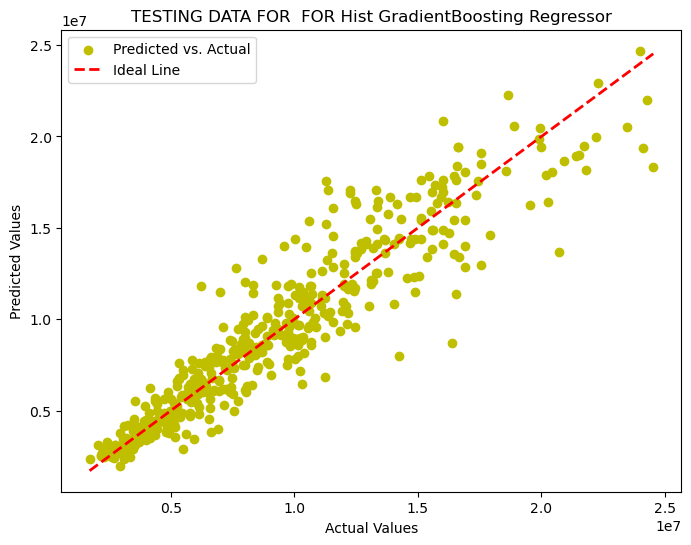

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.5)

standard=MinMaxScaler()
x_train_new=standard.fit_transform(x_train)
x_test_new=standard.transform(x_test)

def get_score(model):
    model.fit(x_train_new,y_train)
    pred=model.predict(x_test_new)
    score=model.score(x_test_new,y_test)
    return score*100

print("These are the accuracy scores for the Testing data  \n")
print(f' For Linear Regression Algorithm, we had an accuracy of {get_score(linear)}')
print(f' For  Ridge Algorithm, we had an accuracy of {get_score(ridge_model)}')
print(f' For Lasso Regression Algorithm, we had an accuracy of {get_score(lasso_model)}')
print(f' For Lars Algorithm, we had an accuracy of {get_score(lars)}')
print(f' For  Orthogonal Matching Pursuit Algorithm, we had an accuracy of {get_score(omp)}')
print(f' For Decision TreeRegressor Algorithm, we had an accuracy of {get_score(dt_regressor)}')
print(f' For Random Forest Regressor Algorithm, we had an accuracy of {get_score(ran)}')
print(f' For Gradient Boost Regressor Algorithm, we had an accuracy of {get_score(gradient)}')
print(f' For Hist Regressor Algorithm, we had an accuracy of {get_score(hist)}')
print(f' For Adaboost Forest Regressor Algorithm, we had an accuracy of {get_score(ada)}')
print(f' For KNN Regressor Algorithm, we had an accuracy of {get_score(knn)}')
print(f' For Elastic Net Algorithm, we had an accuracy of {get_score(el)}')







xx=hist.predict(x_test_new)


# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test,xx, color='y', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')
# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("TESTING DATA FOR  FOR Hist GradientBoosting Regressor")
plt.legend()


0.8518925933262156
SELECTED FEATURES FOR OUR MODEL INCLUDES Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'CPU',
       'RAM (GB)', 'GPU', 'Operating System', 'Weight (kg)', 'storage_type',
       'storage_1', 'storage_2', 'resolution', 'cpu_freq (GHz)', 'gpu_brand'],
      dtype='object')


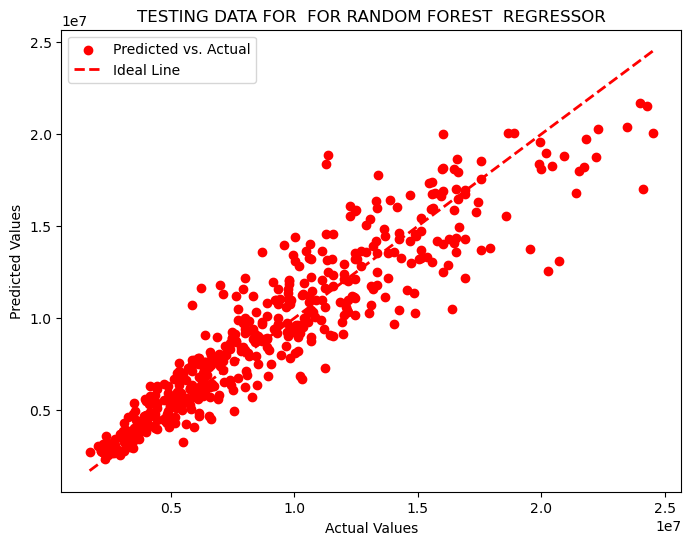

In [66]:
rfe = RFE(estimator=ran, n_features_to_select=15, step=5)
rfe = rfe.fit(x_train_new,y_train)
selected_features2 = x.columns[rfe.support_]
ran=RandomForestRegressor(random_state= 500,
 n_estimators= 1000,
 min_samples_split= 1,
 min_samples_leaf= 1,
 max_features='sqrt',
 max_depth =250,
 criterion= 'squared_error')

ran.fit(x_train_new,y_train)
pred=ran.predict(x_test_new)
score=ran.score(x_test_new,y_test)
print(score)
print(f'SELECTED FEATURES FOR OUR MODEL INCLUDES {selected_features2}')


plt.figure(figsize=(8, 6))
plt.scatter(y_test,pred, color='r', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')
# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("TESTING DATA FOR  FOR RANDOM FOREST  REGRESSOR")
plt.legend()


0.8690313313446328


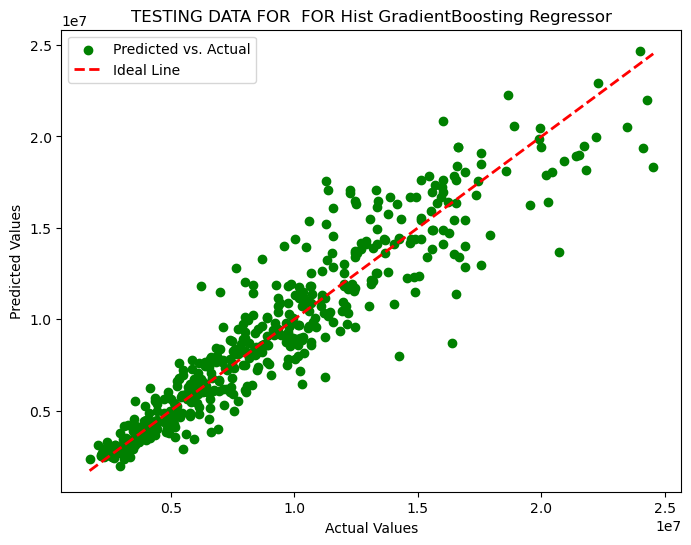

In [67]:

hist=HistGradientBoostingRegressor(quantile= 0.5,
 min_samples_leaf=4,
 max_leaf_nodes=20,
 max_iter= 100,
 max_depth= 500,
 max_bins=50,
 loss='poisson',
 learning_rate=0.1,
 l2_regularization=0.9)

hist.fit(x_train_new,y_train)
pred=hist.predict(x_test_new)
score=hist.score(x_test_new,y_test)
print(score)


plt.figure(figsize=(8, 6))
plt.scatter(y_test,pred, color='g', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')
# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("TESTING DATA FOR  FOR Hist GradientBoosting Regressor")
plt.legend()


0:	learn: 4968764.0235370	total: 13.2ms	remaining: 2m 12s
1:	learn: 4701791.0805160	total: 22.8ms	remaining: 1m 54s
2:	learn: 4432658.2406281	total: 32.4ms	remaining: 1m 47s
3:	learn: 4205599.1609212	total: 40.1ms	remaining: 1m 40s
4:	learn: 4006823.9783564	total: 48ms	remaining: 1m 35s
5:	learn: 3810312.1391460	total: 56.9ms	remaining: 1m 34s
6:	learn: 3641008.7675030	total: 66ms	remaining: 1m 34s
7:	learn: 3493925.1303453	total: 74.4ms	remaining: 1m 32s
8:	learn: 3346546.2432837	total: 83.6ms	remaining: 1m 32s
9:	learn: 3197952.5534180	total: 92.3ms	remaining: 1m 32s
10:	learn: 3054135.6248368	total: 101ms	remaining: 1m 31s
11:	learn: 2929736.0680513	total: 111ms	remaining: 1m 31s
12:	learn: 2827793.7013959	total: 119ms	remaining: 1m 31s
13:	learn: 2717748.9955006	total: 126ms	remaining: 1m 29s
14:	learn: 2633985.0794373	total: 133ms	remaining: 1m 28s
15:	learn: 2546853.6120917	total: 141ms	remaining: 1m 27s
16:	learn: 2466395.2398414	total: 149ms	remaining: 1m 27s
17:	learn: 2401407

156:	learn: 723380.0175171	total: 1.3s	remaining: 1m 21s
157:	learn: 718817.0780154	total: 1.3s	remaining: 1m 21s
158:	learn: 715429.7480905	total: 1.31s	remaining: 1m 21s
159:	learn: 711551.0423552	total: 1.32s	remaining: 1m 21s
160:	learn: 710224.7454208	total: 1.33s	remaining: 1m 21s
161:	learn: 707174.7908781	total: 1.33s	remaining: 1m 21s
162:	learn: 705872.8441516	total: 1.34s	remaining: 1m 20s
163:	learn: 702385.2482723	total: 1.35s	remaining: 1m 20s
164:	learn: 699391.6580439	total: 1.36s	remaining: 1m 20s
165:	learn: 696728.7649848	total: 1.36s	remaining: 1m 20s
166:	learn: 694599.0687903	total: 1.38s	remaining: 1m 20s
167:	learn: 690347.3470229	total: 1.38s	remaining: 1m 21s
168:	learn: 686575.4369063	total: 1.39s	remaining: 1m 20s
169:	learn: 685917.8098277	total: 1.4s	remaining: 1m 20s
170:	learn: 682360.7892578	total: 1.41s	remaining: 1m 20s
171:	learn: 679582.8108754	total: 1.42s	remaining: 1m 21s
172:	learn: 678987.9988148	total: 1.43s	remaining: 1m 21s
173:	learn: 67392

323:	learn: 420765.5484525	total: 2.76s	remaining: 1m 22s
324:	learn: 418895.6268812	total: 2.77s	remaining: 1m 22s
325:	learn: 417330.7756519	total: 2.78s	remaining: 1m 22s
326:	learn: 415782.4649275	total: 2.79s	remaining: 1m 22s
327:	learn: 414695.2469510	total: 2.79s	remaining: 1m 22s
328:	learn: 413000.3608547	total: 2.8s	remaining: 1m 22s
329:	learn: 411863.0852135	total: 2.81s	remaining: 1m 22s
330:	learn: 410683.9852783	total: 2.82s	remaining: 1m 22s
331:	learn: 410337.3720674	total: 2.83s	remaining: 1m 22s
332:	learn: 409194.3494628	total: 2.83s	remaining: 1m 22s
333:	learn: 408025.8562181	total: 2.84s	remaining: 1m 22s
334:	learn: 406779.2872783	total: 2.85s	remaining: 1m 22s
335:	learn: 406457.6039530	total: 2.86s	remaining: 1m 22s
336:	learn: 406404.1844859	total: 2.86s	remaining: 1m 22s
337:	learn: 405750.7477306	total: 2.87s	remaining: 1m 22s
338:	learn: 405700.6577410	total: 2.87s	remaining: 1m 21s
339:	learn: 405060.6274599	total: 2.88s	remaining: 1m 21s
340:	learn: 404

489:	learn: 300076.6694217	total: 4.02s	remaining: 1m 17s
490:	learn: 299392.5401461	total: 4.03s	remaining: 1m 17s
491:	learn: 299045.1810207	total: 4.03s	remaining: 1m 17s
492:	learn: 298434.8987651	total: 4.04s	remaining: 1m 17s
493:	learn: 297891.9405614	total: 4.04s	remaining: 1m 17s
494:	learn: 297452.4874382	total: 4.05s	remaining: 1m 17s
495:	learn: 297159.9515008	total: 4.06s	remaining: 1m 17s
496:	learn: 296600.1330948	total: 4.07s	remaining: 1m 17s
497:	learn: 296194.7447179	total: 4.08s	remaining: 1m 17s
498:	learn: 295808.0371069	total: 4.09s	remaining: 1m 17s
499:	learn: 295343.6237189	total: 4.09s	remaining: 1m 17s
500:	learn: 295264.8731951	total: 4.1s	remaining: 1m 17s
501:	learn: 294765.2216871	total: 4.11s	remaining: 1m 17s
502:	learn: 293485.4866439	total: 4.12s	remaining: 1m 17s
503:	learn: 293457.4857233	total: 4.12s	remaining: 1m 17s
504:	learn: 293234.6706141	total: 4.13s	remaining: 1m 17s
505:	learn: 292914.5042716	total: 4.14s	remaining: 1m 17s
506:	learn: 292

632:	learn: 245669.3720294	total: 5.26s	remaining: 1m 17s
633:	learn: 245656.6395306	total: 5.26s	remaining: 1m 17s
634:	learn: 245362.6354572	total: 5.27s	remaining: 1m 17s
635:	learn: 245274.0696592	total: 5.31s	remaining: 1m 18s
636:	learn: 244909.4686785	total: 5.32s	remaining: 1m 18s
637:	learn: 244885.4160168	total: 5.32s	remaining: 1m 18s
638:	learn: 244690.5558021	total: 5.33s	remaining: 1m 18s
639:	learn: 244336.9089590	total: 5.34s	remaining: 1m 18s
640:	learn: 243852.1987969	total: 5.34s	remaining: 1m 18s
641:	learn: 243452.1303513	total: 5.35s	remaining: 1m 17s
642:	learn: 242979.1034943	total: 5.36s	remaining: 1m 17s
643:	learn: 242837.6673384	total: 5.36s	remaining: 1m 17s
644:	learn: 242574.6206634	total: 5.37s	remaining: 1m 17s
645:	learn: 242496.4875285	total: 5.37s	remaining: 1m 17s
646:	learn: 242160.4426440	total: 5.38s	remaining: 1m 17s
647:	learn: 241801.4553629	total: 5.39s	remaining: 1m 17s
648:	learn: 241225.1241464	total: 5.4s	remaining: 1m 17s
649:	learn: 240

805:	learn: 211067.2898633	total: 6.3s	remaining: 1m 11s
806:	learn: 211056.8334975	total: 6.3s	remaining: 1m 11s
807:	learn: 210926.8879888	total: 6.31s	remaining: 1m 11s
808:	learn: 210802.9502833	total: 6.32s	remaining: 1m 11s
809:	learn: 210642.0577310	total: 6.32s	remaining: 1m 11s
810:	learn: 210401.1273762	total: 6.33s	remaining: 1m 11s
811:	learn: 210241.5680811	total: 6.33s	remaining: 1m 11s
812:	learn: 209903.2521678	total: 6.34s	remaining: 1m 11s
813:	learn: 209755.9525758	total: 6.35s	remaining: 1m 11s
814:	learn: 209570.2659377	total: 6.35s	remaining: 1m 11s
815:	learn: 209370.8843908	total: 6.36s	remaining: 1m 11s
816:	learn: 209108.0497257	total: 6.37s	remaining: 1m 11s
817:	learn: 209041.1625880	total: 6.38s	remaining: 1m 11s
818:	learn: 208940.3926647	total: 6.39s	remaining: 1m 11s
819:	learn: 208733.0497678	total: 6.39s	remaining: 1m 11s
820:	learn: 208535.2117452	total: 6.4s	remaining: 1m 11s
821:	learn: 208466.4896686	total: 6.41s	remaining: 1m 11s
822:	learn: 20827

958:	learn: 193526.2040400	total: 7.56s	remaining: 1m 11s
959:	learn: 193522.5906434	total: 7.57s	remaining: 1m 11s
960:	learn: 193343.4331865	total: 7.58s	remaining: 1m 11s
961:	learn: 193341.2679212	total: 7.59s	remaining: 1m 11s
962:	learn: 193259.5366171	total: 7.59s	remaining: 1m 11s
963:	learn: 193204.5365982	total: 7.6s	remaining: 1m 11s
964:	learn: 193156.3958594	total: 7.61s	remaining: 1m 11s
965:	learn: 193039.2735591	total: 7.62s	remaining: 1m 11s
966:	learn: 192962.6617807	total: 7.63s	remaining: 1m 11s
967:	learn: 192863.4609828	total: 7.63s	remaining: 1m 11s
968:	learn: 192722.5612329	total: 7.64s	remaining: 1m 11s
969:	learn: 192615.1723041	total: 7.65s	remaining: 1m 11s
970:	learn: 192527.5116209	total: 7.66s	remaining: 1m 11s
971:	learn: 192297.8074763	total: 7.67s	remaining: 1m 11s
972:	learn: 192283.4174138	total: 7.68s	remaining: 1m 11s
973:	learn: 192278.5849302	total: 7.68s	remaining: 1m 11s
974:	learn: 192209.8986274	total: 7.69s	remaining: 1m 11s
975:	learn: 192

1112:	learn: 182145.5023704	total: 8.83s	remaining: 1m 10s
1113:	learn: 182045.2941869	total: 8.84s	remaining: 1m 10s
1114:	learn: 181966.4184492	total: 8.85s	remaining: 1m 10s
1115:	learn: 181849.0658760	total: 8.86s	remaining: 1m 10s
1116:	learn: 181756.4315377	total: 8.87s	remaining: 1m 10s
1117:	learn: 181603.6582666	total: 8.87s	remaining: 1m 10s
1118:	learn: 181600.0431181	total: 8.88s	remaining: 1m 10s
1119:	learn: 181585.8886184	total: 8.89s	remaining: 1m 10s
1120:	learn: 181474.9073557	total: 8.89s	remaining: 1m 10s
1121:	learn: 181377.2778271	total: 8.9s	remaining: 1m 10s
1122:	learn: 181295.3603693	total: 8.91s	remaining: 1m 10s
1123:	learn: 181230.4376195	total: 8.92s	remaining: 1m 10s
1124:	learn: 181191.1779425	total: 8.93s	remaining: 1m 10s
1125:	learn: 181126.7304987	total: 8.93s	remaining: 1m 10s
1126:	learn: 181086.5306837	total: 8.94s	remaining: 1m 10s
1127:	learn: 181017.1003566	total: 8.95s	remaining: 1m 10s
1128:	learn: 180844.5453108	total: 8.96s	remaining: 1m 10

1258:	learn: 174300.3594040	total: 10.1s	remaining: 1m 9s
1259:	learn: 174267.7197175	total: 10.1s	remaining: 1m 9s
1260:	learn: 174257.8166353	total: 10.1s	remaining: 1m 9s
1261:	learn: 174221.9983834	total: 10.1s	remaining: 1m 9s
1262:	learn: 174164.1473129	total: 10.1s	remaining: 1m 9s
1263:	learn: 174147.0347988	total: 10.1s	remaining: 1m 9s
1264:	learn: 174104.8021274	total: 10.1s	remaining: 1m 9s
1265:	learn: 174103.9658905	total: 10.1s	remaining: 1m 9s
1266:	learn: 174092.8497791	total: 10.1s	remaining: 1m 9s
1267:	learn: 174080.9297037	total: 10.1s	remaining: 1m 9s
1268:	learn: 174014.5355933	total: 10.1s	remaining: 1m 9s
1269:	learn: 174006.1408864	total: 10.1s	remaining: 1m 9s
1270:	learn: 173980.3504907	total: 10.1s	remaining: 1m 9s
1271:	learn: 173958.8479025	total: 10.2s	remaining: 1m 9s
1272:	learn: 173894.5270329	total: 10.2s	remaining: 1m 9s
1273:	learn: 173833.0566922	total: 10.2s	remaining: 1m 9s
1274:	learn: 173793.3517988	total: 10.2s	remaining: 1m 9s
1275:	learn: 1

1424:	learn: 168421.2329719	total: 11.6s	remaining: 1m 9s
1425:	learn: 168400.0071811	total: 11.6s	remaining: 1m 9s
1426:	learn: 168367.8492895	total: 11.6s	remaining: 1m 9s
1427:	learn: 168334.1670068	total: 11.6s	remaining: 1m 9s
1428:	learn: 168298.1863017	total: 11.6s	remaining: 1m 9s
1429:	learn: 168285.2167889	total: 11.6s	remaining: 1m 9s
1430:	learn: 168270.5925985	total: 11.6s	remaining: 1m 9s
1431:	learn: 168240.7430362	total: 11.6s	remaining: 1m 9s
1432:	learn: 168196.7081636	total: 11.6s	remaining: 1m 9s
1433:	learn: 168172.5974149	total: 11.6s	remaining: 1m 9s
1434:	learn: 168154.8313066	total: 11.6s	remaining: 1m 9s
1435:	learn: 168107.1773042	total: 11.7s	remaining: 1m 9s
1436:	learn: 168050.7279283	total: 11.7s	remaining: 1m 9s
1437:	learn: 168013.5508888	total: 11.7s	remaining: 1m 9s
1438:	learn: 168011.5807956	total: 11.7s	remaining: 1m 9s
1439:	learn: 167985.9328487	total: 11.7s	remaining: 1m 9s
1440:	learn: 167957.2306068	total: 11.7s	remaining: 1m 9s
1441:	learn: 1

1585:	learn: 165222.7703975	total: 12.8s	remaining: 1m 7s
1586:	learn: 165210.0530578	total: 12.8s	remaining: 1m 7s
1587:	learn: 165208.8502930	total: 12.8s	remaining: 1m 7s
1588:	learn: 165195.5733023	total: 12.8s	remaining: 1m 7s
1589:	learn: 165178.7284308	total: 12.8s	remaining: 1m 7s
1590:	learn: 165174.7705181	total: 12.9s	remaining: 1m 7s
1591:	learn: 165167.4565425	total: 12.9s	remaining: 1m 7s
1592:	learn: 165147.1537007	total: 12.9s	remaining: 1m 7s
1593:	learn: 165105.3693626	total: 12.9s	remaining: 1m 7s
1594:	learn: 165086.2999663	total: 12.9s	remaining: 1m 7s
1595:	learn: 165075.5873559	total: 12.9s	remaining: 1m 7s
1596:	learn: 165060.3358907	total: 12.9s	remaining: 1m 7s
1597:	learn: 165038.1961109	total: 12.9s	remaining: 1m 7s
1598:	learn: 165018.2690986	total: 12.9s	remaining: 1m 7s
1599:	learn: 164993.1112337	total: 12.9s	remaining: 1m 7s
1600:	learn: 164982.6987785	total: 12.9s	remaining: 1m 7s
1601:	learn: 164969.6376534	total: 12.9s	remaining: 1m 7s
1602:	learn: 1

1736:	learn: 163448.6061720	total: 14.1s	remaining: 1m 6s
1737:	learn: 163436.6694339	total: 14.1s	remaining: 1m 6s
1738:	learn: 163431.1015112	total: 14.1s	remaining: 1m 6s
1739:	learn: 163426.3170431	total: 14.1s	remaining: 1m 6s
1740:	learn: 163420.0330719	total: 14.1s	remaining: 1m 6s
1741:	learn: 163411.5931195	total: 14.1s	remaining: 1m 6s
1742:	learn: 163388.6418358	total: 14.1s	remaining: 1m 6s
1743:	learn: 163388.2713634	total: 14.1s	remaining: 1m 6s
1744:	learn: 163379.5039871	total: 14.1s	remaining: 1m 6s
1745:	learn: 163370.7312703	total: 14.1s	remaining: 1m 6s
1746:	learn: 163365.8379542	total: 14.1s	remaining: 1m 6s
1747:	learn: 163355.5340321	total: 14.1s	remaining: 1m 6s
1748:	learn: 163349.5502186	total: 14.1s	remaining: 1m 6s
1749:	learn: 163324.6287357	total: 14.1s	remaining: 1m 6s
1750:	learn: 163318.2361377	total: 14.2s	remaining: 1m 6s
1751:	learn: 163311.0684953	total: 14.2s	remaining: 1m 6s
1752:	learn: 163305.5623610	total: 14.2s	remaining: 1m 6s
1753:	learn: 1

1891:	learn: 162374.7027476	total: 15.3s	remaining: 1m 5s
1892:	learn: 162367.8849817	total: 15.3s	remaining: 1m 5s
1893:	learn: 162357.5672777	total: 15.3s	remaining: 1m 5s
1894:	learn: 162351.9839401	total: 15.3s	remaining: 1m 5s
1895:	learn: 162349.5237375	total: 15.3s	remaining: 1m 5s
1896:	learn: 162341.2232248	total: 15.3s	remaining: 1m 5s
1897:	learn: 162336.3352483	total: 15.3s	remaining: 1m 5s
1898:	learn: 162331.4357730	total: 15.3s	remaining: 1m 5s
1899:	learn: 162329.8083185	total: 15.3s	remaining: 1m 5s
1900:	learn: 162325.1547174	total: 15.3s	remaining: 1m 5s
1901:	learn: 162315.8575648	total: 15.4s	remaining: 1m 5s
1902:	learn: 162314.5392758	total: 15.4s	remaining: 1m 5s
1903:	learn: 162309.1183630	total: 15.4s	remaining: 1m 5s
1904:	learn: 162308.1556092	total: 15.4s	remaining: 1m 5s
1905:	learn: 162307.1480465	total: 15.4s	remaining: 1m 5s
1906:	learn: 162302.6088984	total: 15.4s	remaining: 1m 5s
1907:	learn: 162290.3967367	total: 15.4s	remaining: 1m 5s
1908:	learn: 1

2044:	learn: 161696.7498249	total: 16.5s	remaining: 1m 4s
2045:	learn: 161694.7312985	total: 16.5s	remaining: 1m 4s
2046:	learn: 161692.4636626	total: 16.5s	remaining: 1m 4s
2047:	learn: 161690.4968368	total: 16.6s	remaining: 1m 4s
2048:	learn: 161690.2752749	total: 16.6s	remaining: 1m 4s
2049:	learn: 161687.9519711	total: 16.6s	remaining: 1m 4s
2050:	learn: 161685.5378869	total: 16.6s	remaining: 1m 4s
2051:	learn: 161682.9104381	total: 16.6s	remaining: 1m 4s
2052:	learn: 161679.6521318	total: 16.6s	remaining: 1m 4s
2053:	learn: 161677.5963429	total: 16.6s	remaining: 1m 4s
2054:	learn: 161676.1562700	total: 16.6s	remaining: 1m 4s
2055:	learn: 161676.0847950	total: 16.6s	remaining: 1m 4s
2056:	learn: 161670.2165531	total: 16.6s	remaining: 1m 4s
2057:	learn: 161665.8637403	total: 16.6s	remaining: 1m 4s
2058:	learn: 161664.1019451	total: 16.6s	remaining: 1m 4s
2059:	learn: 161662.6844007	total: 16.6s	remaining: 1m 4s
2060:	learn: 161657.7853746	total: 16.7s	remaining: 1m 4s
2061:	learn: 1

2186:	learn: 161274.9258365	total: 17.8s	remaining: 1m 3s
2187:	learn: 161271.0754766	total: 17.8s	remaining: 1m 3s
2188:	learn: 161263.9433198	total: 17.8s	remaining: 1m 3s
2189:	learn: 161260.8120143	total: 17.8s	remaining: 1m 3s
2190:	learn: 161259.8419788	total: 17.8s	remaining: 1m 3s
2191:	learn: 161255.0418245	total: 17.8s	remaining: 1m 3s
2192:	learn: 161252.6165349	total: 17.8s	remaining: 1m 3s
2193:	learn: 161249.1053927	total: 17.8s	remaining: 1m 3s
2194:	learn: 161246.2313532	total: 17.8s	remaining: 1m 3s
2195:	learn: 161245.3488803	total: 17.8s	remaining: 1m 3s
2196:	learn: 161244.4849227	total: 17.8s	remaining: 1m 3s
2197:	learn: 161244.0403134	total: 17.8s	remaining: 1m 3s
2198:	learn: 161241.6633768	total: 17.8s	remaining: 1m 3s
2199:	learn: 161240.7419010	total: 17.9s	remaining: 1m 3s
2200:	learn: 161240.3360665	total: 17.9s	remaining: 1m 3s
2201:	learn: 161238.1436613	total: 17.9s	remaining: 1m 3s
2202:	learn: 161235.1843650	total: 17.9s	remaining: 1m 3s
2203:	learn: 1

2342:	learn: 161014.9725247	total: 19s	remaining: 1m 2s
2343:	learn: 161011.4253019	total: 19s	remaining: 1m 2s
2344:	learn: 161010.0845191	total: 19s	remaining: 1m 2s
2345:	learn: 161010.0708527	total: 19s	remaining: 1m 2s
2346:	learn: 161008.8043619	total: 19s	remaining: 1m 2s
2347:	learn: 161007.8492727	total: 19s	remaining: 1m 2s
2348:	learn: 161007.5101032	total: 19s	remaining: 1m 2s
2349:	learn: 161007.0497058	total: 19s	remaining: 1m 2s
2350:	learn: 161006.3014366	total: 19.1s	remaining: 1m 1s
2351:	learn: 161005.5779309	total: 19.1s	remaining: 1m 1s
2352:	learn: 161002.6965416	total: 19.1s	remaining: 1m 1s
2353:	learn: 161001.7846608	total: 19.1s	remaining: 1m 1s
2354:	learn: 161001.0275695	total: 19.1s	remaining: 1m 1s
2355:	learn: 160999.0348845	total: 19.1s	remaining: 1m 1s
2356:	learn: 160996.0453235	total: 19.1s	remaining: 1m 1s
2357:	learn: 160995.2534529	total: 19.1s	remaining: 1m 1s
2358:	learn: 160994.5518014	total: 19.1s	remaining: 1m 1s
2359:	learn: 160993.8593787	to

2490:	learn: 160851.6537608	total: 20.2s	remaining: 1m
2491:	learn: 160849.7986994	total: 20.2s	remaining: 1m
2492:	learn: 160848.6286571	total: 20.2s	remaining: 1m
2493:	learn: 160847.4401731	total: 20.2s	remaining: 1m
2494:	learn: 160846.2687391	total: 20.2s	remaining: 1m
2495:	learn: 160845.3724696	total: 20.3s	remaining: 1m
2496:	learn: 160845.1734158	total: 20.3s	remaining: 1m
2497:	learn: 160844.4354551	total: 20.3s	remaining: 1m
2498:	learn: 160844.2383320	total: 20.3s	remaining: 1m
2499:	learn: 160842.8229611	total: 20.3s	remaining: 1m
2500:	learn: 160842.7699554	total: 20.3s	remaining: 1m
2501:	learn: 160841.7494975	total: 20.3s	remaining: 1m
2502:	learn: 160841.4785562	total: 20.3s	remaining: 1m
2503:	learn: 160841.3727229	total: 20.3s	remaining: 1m
2504:	learn: 160840.7773849	total: 20.3s	remaining: 1m
2505:	learn: 160839.5343792	total: 20.3s	remaining: 1m
2506:	learn: 160837.8820841	total: 20.3s	remaining: 1m
2507:	learn: 160837.4515611	total: 20.3s	remaining: 1m
2508:	lear

2651:	learn: 160737.4820251	total: 21.5s	remaining: 59.5s
2652:	learn: 160737.3900872	total: 21.5s	remaining: 59.5s
2653:	learn: 160737.1827162	total: 21.5s	remaining: 59.5s
2654:	learn: 160737.0359402	total: 21.5s	remaining: 59.5s
2655:	learn: 160736.3241905	total: 21.5s	remaining: 59.5s
2656:	learn: 160735.9041111	total: 21.5s	remaining: 59.5s
2657:	learn: 160735.7415050	total: 21.5s	remaining: 59.5s
2658:	learn: 160735.2326283	total: 21.5s	remaining: 59.5s
2659:	learn: 160734.6503354	total: 21.5s	remaining: 59.4s
2660:	learn: 160734.1165672	total: 21.6s	remaining: 59.4s
2661:	learn: 160733.5153597	total: 21.6s	remaining: 59.4s
2662:	learn: 160733.0744735	total: 21.6s	remaining: 59.4s
2663:	learn: 160732.9654094	total: 21.6s	remaining: 59.4s
2664:	learn: 160732.8850362	total: 21.6s	remaining: 59.4s
2665:	learn: 160732.7863918	total: 21.6s	remaining: 59.4s
2666:	learn: 160732.2755620	total: 21.6s	remaining: 59.4s
2667:	learn: 160731.5822454	total: 21.6s	remaining: 59.4s
2668:	learn: 1

2796:	learn: 160670.7992964	total: 22.7s	remaining: 58.6s
2797:	learn: 160670.4558266	total: 22.8s	remaining: 58.6s
2798:	learn: 160669.9392358	total: 22.8s	remaining: 58.6s
2799:	learn: 160669.7116944	total: 22.8s	remaining: 58.6s
2800:	learn: 160669.3553638	total: 22.8s	remaining: 58.5s
2801:	learn: 160668.9751690	total: 22.8s	remaining: 58.5s
2802:	learn: 160668.8457507	total: 22.8s	remaining: 58.5s
2803:	learn: 160668.4174037	total: 22.8s	remaining: 58.5s
2804:	learn: 160668.0769408	total: 22.8s	remaining: 58.5s
2805:	learn: 160667.1718152	total: 22.8s	remaining: 58.5s
2806:	learn: 160666.8641163	total: 22.8s	remaining: 58.5s
2807:	learn: 160665.5318736	total: 22.8s	remaining: 58.5s
2808:	learn: 160665.3468038	total: 22.8s	remaining: 58.5s
2809:	learn: 160665.0235345	total: 22.9s	remaining: 58.5s
2810:	learn: 160664.8053139	total: 22.9s	remaining: 58.5s
2811:	learn: 160664.3065461	total: 22.9s	remaining: 58.5s
2812:	learn: 160664.0007121	total: 22.9s	remaining: 58.5s
2813:	learn: 1

2960:	learn: 160627.6376650	total: 24.2s	remaining: 57.5s
2961:	learn: 160627.5009265	total: 24.2s	remaining: 57.5s
2962:	learn: 160627.1211076	total: 24.2s	remaining: 57.5s
2963:	learn: 160627.0191968	total: 24.2s	remaining: 57.5s
2964:	learn: 160626.9394767	total: 24.2s	remaining: 57.5s
2965:	learn: 160626.7920120	total: 24.2s	remaining: 57.5s
2966:	learn: 160626.5521031	total: 24.2s	remaining: 57.4s
2967:	learn: 160626.2765030	total: 24.2s	remaining: 57.4s
2968:	learn: 160626.1667165	total: 24.2s	remaining: 57.4s
2969:	learn: 160626.0680469	total: 24.3s	remaining: 57.4s
2970:	learn: 160625.6709206	total: 24.3s	remaining: 57.4s
2971:	learn: 160625.2198177	total: 24.3s	remaining: 57.4s
2972:	learn: 160624.8485831	total: 24.3s	remaining: 57.4s
2973:	learn: 160624.7179867	total: 24.3s	remaining: 57.4s
2974:	learn: 160624.6335519	total: 24.3s	remaining: 57.4s
2975:	learn: 160624.5151089	total: 24.3s	remaining: 57.4s
2976:	learn: 160624.4146583	total: 24.3s	remaining: 57.4s
2977:	learn: 1

3116:	learn: 160598.0275027	total: 25.4s	remaining: 56.2s
3117:	learn: 160597.8316942	total: 25.5s	remaining: 56.2s
3118:	learn: 160597.6720729	total: 25.5s	remaining: 56.2s
3119:	learn: 160597.4787375	total: 25.5s	remaining: 56.2s
3120:	learn: 160597.4202383	total: 25.5s	remaining: 56.1s
3121:	learn: 160597.0786156	total: 25.5s	remaining: 56.1s
3122:	learn: 160596.9906739	total: 25.5s	remaining: 56.1s
3123:	learn: 160596.9254082	total: 25.5s	remaining: 56.1s
3124:	learn: 160596.2331923	total: 25.5s	remaining: 56.1s
3125:	learn: 160596.0616882	total: 25.5s	remaining: 56.1s
3126:	learn: 160595.8537742	total: 25.5s	remaining: 56.1s
3127:	learn: 160595.2760889	total: 25.5s	remaining: 56.1s
3128:	learn: 160595.1879328	total: 25.5s	remaining: 56.1s
3129:	learn: 160594.9443272	total: 25.5s	remaining: 56.1s
3130:	learn: 160594.8769371	total: 25.6s	remaining: 56.1s
3131:	learn: 160594.7893947	total: 25.6s	remaining: 56s
3132:	learn: 160594.5815462	total: 25.6s	remaining: 56s
3133:	learn: 16059

3274:	learn: 160578.4816174	total: 26.7s	remaining: 54.8s
3275:	learn: 160578.2928699	total: 26.7s	remaining: 54.8s
3276:	learn: 160577.9024498	total: 26.7s	remaining: 54.8s
3277:	learn: 160577.8645648	total: 26.7s	remaining: 54.8s
3278:	learn: 160577.8434260	total: 26.7s	remaining: 54.8s
3279:	learn: 160577.8089665	total: 26.7s	remaining: 54.8s
3280:	learn: 160577.6416015	total: 26.7s	remaining: 54.8s
3281:	learn: 160577.5320954	total: 26.8s	remaining: 54.8s
3282:	learn: 160577.4300778	total: 26.8s	remaining: 54.7s
3283:	learn: 160577.2724453	total: 26.8s	remaining: 54.7s
3284:	learn: 160577.1546370	total: 26.8s	remaining: 54.7s
3285:	learn: 160577.0352993	total: 26.8s	remaining: 54.7s
3286:	learn: 160577.0125594	total: 26.8s	remaining: 54.7s
3287:	learn: 160576.9508560	total: 26.8s	remaining: 54.7s
3288:	learn: 160576.6637755	total: 26.8s	remaining: 54.7s
3289:	learn: 160576.5646503	total: 26.8s	remaining: 54.7s
3290:	learn: 160576.5050006	total: 26.8s	remaining: 54.7s
3291:	learn: 1

3428:	learn: 160564.5834764	total: 28s	remaining: 53.6s
3429:	learn: 160564.4543096	total: 28s	remaining: 53.6s
3430:	learn: 160564.3913207	total: 28s	remaining: 53.6s
3431:	learn: 160564.3476106	total: 28s	remaining: 53.5s
3432:	learn: 160564.3298756	total: 28s	remaining: 53.5s
3433:	learn: 160564.3218483	total: 28s	remaining: 53.5s
3434:	learn: 160564.2603413	total: 28s	remaining: 53.5s
3435:	learn: 160564.1862190	total: 28s	remaining: 53.5s
3436:	learn: 160564.1548191	total: 28s	remaining: 53.5s
3437:	learn: 160564.1030678	total: 28s	remaining: 53.5s
3438:	learn: 160564.0745625	total: 28s	remaining: 53.5s
3439:	learn: 160564.0186334	total: 28s	remaining: 53.5s
3440:	learn: 160564.0137037	total: 28s	remaining: 53.5s
3441:	learn: 160563.9816958	total: 28.1s	remaining: 53.5s
3442:	learn: 160563.9426740	total: 28.1s	remaining: 53.4s
3443:	learn: 160563.8459964	total: 28.1s	remaining: 53.4s
3444:	learn: 160563.8067430	total: 28.1s	remaining: 53.4s
3445:	learn: 160563.7472097	total: 28.1s

3574:	learn: 160557.1973033	total: 29.2s	remaining: 52.5s
3575:	learn: 160557.1288768	total: 29.2s	remaining: 52.5s
3576:	learn: 160557.0027150	total: 29.3s	remaining: 52.5s
3577:	learn: 160556.9648125	total: 29.3s	remaining: 52.5s
3578:	learn: 160556.9616522	total: 29.3s	remaining: 52.5s
3579:	learn: 160556.8765548	total: 29.3s	remaining: 52.5s
3580:	learn: 160556.8740338	total: 29.3s	remaining: 52.5s
3581:	learn: 160556.8658795	total: 29.3s	remaining: 52.5s
3582:	learn: 160556.8473970	total: 29.3s	remaining: 52.5s
3583:	learn: 160556.8436611	total: 29.3s	remaining: 52.5s
3584:	learn: 160556.7783680	total: 29.3s	remaining: 52.5s
3585:	learn: 160556.7229379	total: 29.3s	remaining: 52.5s
3586:	learn: 160556.7063752	total: 29.3s	remaining: 52.5s
3587:	learn: 160556.6858408	total: 29.3s	remaining: 52.4s
3588:	learn: 160556.6616880	total: 29.4s	remaining: 52.4s
3589:	learn: 160556.5991576	total: 29.4s	remaining: 52.4s
3590:	learn: 160556.5525606	total: 29.4s	remaining: 52.4s
3591:	learn: 1

3719:	learn: 160552.0486931	total: 30.5s	remaining: 51.4s
3720:	learn: 160551.9773204	total: 30.5s	remaining: 51.4s
3721:	learn: 160551.9655576	total: 30.5s	remaining: 51.4s
3722:	learn: 160551.9387413	total: 30.5s	remaining: 51.4s
3723:	learn: 160551.9138733	total: 30.5s	remaining: 51.4s
3724:	learn: 160551.8810454	total: 30.5s	remaining: 51.4s
3725:	learn: 160551.8456146	total: 30.5s	remaining: 51.4s
3726:	learn: 160551.8256716	total: 30.5s	remaining: 51.4s
3727:	learn: 160551.8131394	total: 30.5s	remaining: 51.4s
3728:	learn: 160551.7854216	total: 30.5s	remaining: 51.4s
3729:	learn: 160551.7425529	total: 30.6s	remaining: 51.4s
3730:	learn: 160551.7307458	total: 30.6s	remaining: 51.4s
3731:	learn: 160551.7167865	total: 30.6s	remaining: 51.3s
3732:	learn: 160551.6998117	total: 30.6s	remaining: 51.3s
3733:	learn: 160551.6875422	total: 30.6s	remaining: 51.3s
3734:	learn: 160551.6825133	total: 30.6s	remaining: 51.3s
3735:	learn: 160551.6487854	total: 30.6s	remaining: 51.3s
3736:	learn: 1

3869:	learn: 160548.6851081	total: 31.7s	remaining: 50.2s
3870:	learn: 160548.6754895	total: 31.7s	remaining: 50.2s
3871:	learn: 160548.6721661	total: 31.7s	remaining: 50.2s
3872:	learn: 160548.6666535	total: 31.7s	remaining: 50.2s
3873:	learn: 160548.6574003	total: 31.7s	remaining: 50.2s
3874:	learn: 160548.6477831	total: 31.8s	remaining: 50.2s
3875:	learn: 160548.5796237	total: 31.8s	remaining: 50.2s
3876:	learn: 160548.5551318	total: 31.8s	remaining: 50.2s
3877:	learn: 160548.5332908	total: 31.8s	remaining: 50.2s
3878:	learn: 160548.5065992	total: 31.8s	remaining: 50.2s
3879:	learn: 160548.4804197	total: 31.8s	remaining: 50.1s
3880:	learn: 160548.4436300	total: 31.8s	remaining: 50.1s
3881:	learn: 160548.4245848	total: 31.8s	remaining: 50.1s
3882:	learn: 160548.4083515	total: 31.8s	remaining: 50.1s
3883:	learn: 160548.3892065	total: 31.8s	remaining: 50.1s
3884:	learn: 160548.3848599	total: 31.8s	remaining: 50.1s
3885:	learn: 160548.3659474	total: 31.8s	remaining: 50.1s
3886:	learn: 1

4018:	learn: 160546.2985260	total: 33s	remaining: 49.1s
4019:	learn: 160546.2907521	total: 33s	remaining: 49.1s
4020:	learn: 160546.2445867	total: 33s	remaining: 49.1s
4021:	learn: 160546.2411052	total: 33s	remaining: 49s
4022:	learn: 160546.2393066	total: 33s	remaining: 49s
4023:	learn: 160546.2247122	total: 33s	remaining: 49s
4024:	learn: 160546.2141477	total: 33s	remaining: 49s
4025:	learn: 160546.2046504	total: 33s	remaining: 49s
4026:	learn: 160546.1878163	total: 33s	remaining: 49s
4027:	learn: 160546.1731035	total: 33s	remaining: 49s
4028:	learn: 160546.1636767	total: 33.1s	remaining: 49s
4029:	learn: 160546.1628990	total: 33.1s	remaining: 49s
4030:	learn: 160546.1182342	total: 33.1s	remaining: 49s
4031:	learn: 160546.0895252	total: 33.1s	remaining: 49s
4032:	learn: 160546.0663028	total: 33.1s	remaining: 49s
4033:	learn: 160546.0647423	total: 33.1s	remaining: 48.9s
4034:	learn: 160546.0371635	total: 33.1s	remaining: 48.9s
4035:	learn: 160546.0222707	total: 33.1s	remaining: 48.9s


4163:	learn: 160544.5976322	total: 34.2s	remaining: 48s
4164:	learn: 160544.5823815	total: 34.2s	remaining: 48s
4165:	learn: 160544.5759865	total: 34.2s	remaining: 48s
4166:	learn: 160544.5632557	total: 34.3s	remaining: 48s
4167:	learn: 160544.5594147	total: 34.3s	remaining: 47.9s
4168:	learn: 160544.5403976	total: 34.3s	remaining: 47.9s
4169:	learn: 160544.5322854	total: 34.3s	remaining: 47.9s
4170:	learn: 160544.5188434	total: 34.3s	remaining: 47.9s
4171:	learn: 160544.5142302	total: 34.3s	remaining: 47.9s
4172:	learn: 160544.5112626	total: 34.3s	remaining: 47.9s
4173:	learn: 160544.5008417	total: 34.3s	remaining: 47.9s
4174:	learn: 160544.4914828	total: 34.3s	remaining: 47.9s
4175:	learn: 160544.4879022	total: 34.3s	remaining: 47.9s
4176:	learn: 160544.4794110	total: 34.3s	remaining: 47.9s
4177:	learn: 160544.4755438	total: 34.3s	remaining: 47.9s
4178:	learn: 160544.4720818	total: 34.4s	remaining: 47.9s
4179:	learn: 160544.4626904	total: 34.4s	remaining: 47.8s
4180:	learn: 160544.46

4315:	learn: 160543.7479058	total: 35.5s	remaining: 46.7s
4316:	learn: 160543.7373263	total: 35.5s	remaining: 46.7s
4317:	learn: 160543.7351820	total: 35.5s	remaining: 46.7s
4318:	learn: 160543.7330484	total: 35.5s	remaining: 46.7s
4319:	learn: 160543.7068615	total: 35.5s	remaining: 46.7s
4320:	learn: 160543.7066535	total: 35.5s	remaining: 46.6s
4321:	learn: 160543.7044034	total: 35.5s	remaining: 46.6s
4322:	learn: 160543.7009342	total: 35.5s	remaining: 46.6s
4323:	learn: 160543.6920213	total: 35.5s	remaining: 46.6s
4324:	learn: 160543.6898143	total: 35.5s	remaining: 46.6s
4325:	learn: 160543.6888451	total: 35.5s	remaining: 46.6s
4326:	learn: 160543.6867421	total: 35.5s	remaining: 46.6s
4327:	learn: 160543.6789264	total: 35.5s	remaining: 46.6s
4328:	learn: 160543.6699131	total: 35.6s	remaining: 46.6s
4329:	learn: 160543.6675401	total: 35.6s	remaining: 46.6s
4330:	learn: 160543.6580520	total: 35.6s	remaining: 46.6s
4331:	learn: 160543.6541637	total: 35.6s	remaining: 46.5s
4332:	learn: 1

4480:	learn: 160543.0229484	total: 36.9s	remaining: 45.4s
4481:	learn: 160543.0204342	total: 36.9s	remaining: 45.4s
4482:	learn: 160543.0096966	total: 36.9s	remaining: 45.4s
4483:	learn: 160543.0055440	total: 36.9s	remaining: 45.4s
4484:	learn: 160543.0052119	total: 36.9s	remaining: 45.4s
4485:	learn: 160543.0039455	total: 36.9s	remaining: 45.4s
4486:	learn: 160543.0027087	total: 36.9s	remaining: 45.4s
4487:	learn: 160542.9988299	total: 36.9s	remaining: 45.4s
4488:	learn: 160542.9956711	total: 37s	remaining: 45.4s
4489:	learn: 160542.9877842	total: 37s	remaining: 45.4s
4490:	learn: 160542.9849013	total: 37s	remaining: 45.3s
4491:	learn: 160542.9773186	total: 37s	remaining: 45.3s
4492:	learn: 160542.9757708	total: 37s	remaining: 45.3s
4493:	learn: 160542.9615381	total: 37s	remaining: 45.3s
4494:	learn: 160542.9582968	total: 37s	remaining: 45.3s
4495:	learn: 160542.9578318	total: 37s	remaining: 45.3s
4496:	learn: 160542.9521028	total: 37s	remaining: 45.3s
4497:	learn: 160542.9496254	tota

4630:	learn: 160542.5968419	total: 38.1s	remaining: 44.2s
4631:	learn: 160542.5920889	total: 38.2s	remaining: 44.2s
4632:	learn: 160542.5910931	total: 38.2s	remaining: 44.2s
4633:	learn: 160542.5880276	total: 38.2s	remaining: 44.2s
4634:	learn: 160542.5868803	total: 38.2s	remaining: 44.2s
4635:	learn: 160542.5855457	total: 38.2s	remaining: 44.2s
4636:	learn: 160542.5847212	total: 38.2s	remaining: 44.2s
4637:	learn: 160542.5841049	total: 38.2s	remaining: 44.2s
4638:	learn: 160542.5831616	total: 38.2s	remaining: 44.2s
4639:	learn: 160542.5823860	total: 38.2s	remaining: 44.1s
4640:	learn: 160542.5819867	total: 38.2s	remaining: 44.1s
4641:	learn: 160542.5806397	total: 38.2s	remaining: 44.1s
4642:	learn: 160542.5787144	total: 38.2s	remaining: 44.1s
4643:	learn: 160542.5783546	total: 38.2s	remaining: 44.1s
4644:	learn: 160542.5762596	total: 38.3s	remaining: 44.1s
4645:	learn: 160542.5758755	total: 38.3s	remaining: 44.1s
4646:	learn: 160542.5727438	total: 38.3s	remaining: 44.1s
4647:	learn: 1

4774:	learn: 160542.3427989	total: 39.4s	remaining: 43.1s
4775:	learn: 160542.3419738	total: 39.4s	remaining: 43.1s
4776:	learn: 160542.3419268	total: 39.4s	remaining: 43.1s
4777:	learn: 160542.3402982	total: 39.4s	remaining: 43.1s
4778:	learn: 160542.3389561	total: 39.4s	remaining: 43.1s
4779:	learn: 160542.3382645	total: 39.4s	remaining: 43.1s
4780:	learn: 160542.3378152	total: 39.5s	remaining: 43.1s
4781:	learn: 160542.3363830	total: 39.5s	remaining: 43.1s
4782:	learn: 160542.3309142	total: 39.5s	remaining: 43s
4783:	learn: 160542.3305254	total: 39.5s	remaining: 43s
4784:	learn: 160542.3288387	total: 39.5s	remaining: 43s
4785:	learn: 160542.3271795	total: 39.5s	remaining: 43s
4786:	learn: 160542.3264338	total: 39.5s	remaining: 43s
4787:	learn: 160542.3242699	total: 39.5s	remaining: 43s
4788:	learn: 160542.3237024	total: 39.5s	remaining: 43s
4789:	learn: 160542.3229637	total: 39.5s	remaining: 43s
4790:	learn: 160542.3193959	total: 39.5s	remaining: 43s
4791:	learn: 160542.3188265	tota

4928:	learn: 160542.1481472	total: 40.6s	remaining: 41.8s
4929:	learn: 160542.1479110	total: 40.7s	remaining: 41.8s
4930:	learn: 160542.1467962	total: 40.7s	remaining: 41.8s
4931:	learn: 160542.1456790	total: 40.7s	remaining: 41.8s
4932:	learn: 160542.1441535	total: 40.7s	remaining: 41.8s
4933:	learn: 160542.1435386	total: 40.7s	remaining: 41.8s
4934:	learn: 160542.1428377	total: 40.7s	remaining: 41.8s
4935:	learn: 160542.1418492	total: 40.7s	remaining: 41.8s
4936:	learn: 160542.1415768	total: 40.7s	remaining: 41.8s
4937:	learn: 160542.1413102	total: 40.7s	remaining: 41.7s
4938:	learn: 160542.1403306	total: 40.7s	remaining: 41.7s
4939:	learn: 160542.1385376	total: 40.7s	remaining: 41.7s
4940:	learn: 160542.1384540	total: 40.7s	remaining: 41.7s
4941:	learn: 160542.1359945	total: 40.8s	remaining: 41.7s
4942:	learn: 160542.1349173	total: 40.8s	remaining: 41.7s
4943:	learn: 160542.1343018	total: 40.8s	remaining: 41.7s
4944:	learn: 160542.1338722	total: 40.8s	remaining: 41.7s
4945:	learn: 1

5086:	learn: 160542.0391111	total: 41.9s	remaining: 40.5s
5087:	learn: 160542.0387053	total: 41.9s	remaining: 40.5s
5088:	learn: 160542.0379800	total: 41.9s	remaining: 40.4s
5089:	learn: 160542.0373846	total: 41.9s	remaining: 40.4s
5090:	learn: 160542.0371113	total: 41.9s	remaining: 40.4s
5091:	learn: 160542.0361797	total: 41.9s	remaining: 40.4s
5092:	learn: 160542.0356966	total: 41.9s	remaining: 40.4s
5093:	learn: 160542.0348624	total: 42s	remaining: 40.4s
5094:	learn: 160542.0342565	total: 42s	remaining: 40.4s
5095:	learn: 160542.0338396	total: 42s	remaining: 40.4s
5096:	learn: 160542.0334274	total: 42s	remaining: 40.4s
5097:	learn: 160542.0331232	total: 42s	remaining: 40.4s
5098:	learn: 160542.0322128	total: 42s	remaining: 40.4s
5099:	learn: 160542.0316501	total: 42s	remaining: 40.4s
5100:	learn: 160542.0306448	total: 42s	remaining: 40.3s
5101:	learn: 160542.0300081	total: 42s	remaining: 40.3s
5102:	learn: 160542.0292549	total: 42s	remaining: 40.3s
5103:	learn: 160542.0290439	total:

5232:	learn: 160541.9653073	total: 43.2s	remaining: 39.3s
5233:	learn: 160541.9650303	total: 43.2s	remaining: 39.3s
5234:	learn: 160541.9650078	total: 43.2s	remaining: 39.3s
5235:	learn: 160541.9643146	total: 43.2s	remaining: 39.3s
5236:	learn: 160541.9641510	total: 43.2s	remaining: 39.3s
5237:	learn: 160541.9640678	total: 43.3s	remaining: 39.3s
5238:	learn: 160541.9639613	total: 43.3s	remaining: 39.3s
5239:	learn: 160541.9635866	total: 43.3s	remaining: 39.3s
5240:	learn: 160541.9634833	total: 43.3s	remaining: 39.3s
5241:	learn: 160541.9631117	total: 43.3s	remaining: 39.3s
5242:	learn: 160541.9628969	total: 43.3s	remaining: 39.3s
5243:	learn: 160541.9624440	total: 43.3s	remaining: 39.3s
5244:	learn: 160541.9619961	total: 43.3s	remaining: 39.3s
5245:	learn: 160541.9619431	total: 43.3s	remaining: 39.3s
5246:	learn: 160541.9615004	total: 43.3s	remaining: 39.2s
5247:	learn: 160541.9612298	total: 43.3s	remaining: 39.2s
5248:	learn: 160541.9611484	total: 43.3s	remaining: 39.2s
5249:	learn: 1

5395:	learn: 160541.9142981	total: 44.6s	remaining: 38.1s
5396:	learn: 160541.9141841	total: 44.7s	remaining: 38.1s
5397:	learn: 160541.9141079	total: 44.7s	remaining: 38.1s
5398:	learn: 160541.9137936	total: 44.7s	remaining: 38.1s
5399:	learn: 160541.9135045	total: 44.7s	remaining: 38.1s
5400:	learn: 160541.9133866	total: 44.7s	remaining: 38.1s
5401:	learn: 160541.9132587	total: 44.7s	remaining: 38s
5402:	learn: 160541.9130799	total: 44.7s	remaining: 38s
5403:	learn: 160541.9124575	total: 44.7s	remaining: 38s
5404:	learn: 160541.9113686	total: 44.7s	remaining: 38s
5405:	learn: 160541.9111675	total: 44.7s	remaining: 38s
5406:	learn: 160541.9109384	total: 44.7s	remaining: 38s
5407:	learn: 160541.9108610	total: 44.7s	remaining: 38s
5408:	learn: 160541.9106144	total: 44.8s	remaining: 38s
5409:	learn: 160541.9103632	total: 44.8s	remaining: 38s
5410:	learn: 160541.9101153	total: 44.8s	remaining: 38s
5411:	learn: 160541.9100159	total: 44.8s	remaining: 38s
5412:	learn: 160541.9099268	total: 4

5548:	learn: 160541.8784061	total: 45.9s	remaining: 36.8s
5549:	learn: 160541.8783292	total: 45.9s	remaining: 36.8s
5550:	learn: 160541.8781672	total: 45.9s	remaining: 36.8s
5551:	learn: 160541.8778216	total: 46s	remaining: 36.8s
5552:	learn: 160541.8777411	total: 46s	remaining: 36.8s
5553:	learn: 160541.8776446	total: 46s	remaining: 36.8s
5554:	learn: 160541.8776211	total: 46s	remaining: 36.8s
5555:	learn: 160541.8773911	total: 46s	remaining: 36.8s
5556:	learn: 160541.8765191	total: 46s	remaining: 36.8s
5557:	learn: 160541.8761664	total: 46s	remaining: 36.8s
5558:	learn: 160541.8761652	total: 46s	remaining: 36.8s
5559:	learn: 160541.8760972	total: 46s	remaining: 36.7s
5560:	learn: 160541.8759717	total: 46s	remaining: 36.7s
5561:	learn: 160541.8751283	total: 46s	remaining: 36.7s
5562:	learn: 160541.8748888	total: 46s	remaining: 36.7s
5563:	learn: 160541.8748316	total: 46s	remaining: 36.7s
5564:	learn: 160541.8743882	total: 46.1s	remaining: 36.7s
5565:	learn: 160541.8740582	total: 46.1s

5709:	learn: 160541.8522959	total: 47.4s	remaining: 35.6s
5710:	learn: 160541.8521960	total: 47.4s	remaining: 35.6s
5711:	learn: 160541.8520978	total: 47.4s	remaining: 35.6s
5712:	learn: 160541.8520058	total: 47.4s	remaining: 35.6s
5713:	learn: 160541.8519714	total: 47.4s	remaining: 35.6s
5714:	learn: 160541.8518897	total: 47.4s	remaining: 35.6s
5715:	learn: 160541.8517519	total: 47.4s	remaining: 35.6s
5716:	learn: 160541.8516813	total: 47.4s	remaining: 35.5s
5717:	learn: 160541.8515555	total: 47.5s	remaining: 35.5s
5718:	learn: 160541.8515478	total: 47.5s	remaining: 35.5s
5719:	learn: 160541.8514506	total: 47.5s	remaining: 35.5s
5720:	learn: 160541.8513622	total: 47.5s	remaining: 35.5s
5721:	learn: 160541.8511504	total: 47.5s	remaining: 35.5s
5722:	learn: 160541.8511040	total: 47.5s	remaining: 35.5s
5723:	learn: 160541.8510006	total: 47.5s	remaining: 35.5s
5724:	learn: 160541.8509503	total: 47.5s	remaining: 35.5s
5725:	learn: 160541.8508284	total: 47.5s	remaining: 35.5s
5726:	learn: 1

5858:	learn: 160541.8381790	total: 48.6s	remaining: 34.4s
5859:	learn: 160541.8381648	total: 48.6s	remaining: 34.3s
5860:	learn: 160541.8380987	total: 48.6s	remaining: 34.3s
5861:	learn: 160541.8380413	total: 48.6s	remaining: 34.3s
5862:	learn: 160541.8379885	total: 48.6s	remaining: 34.3s
5863:	learn: 160541.8377949	total: 48.6s	remaining: 34.3s
5864:	learn: 160541.8377027	total: 48.6s	remaining: 34.3s
5865:	learn: 160541.8376679	total: 48.7s	remaining: 34.3s
5866:	learn: 160541.8372988	total: 48.7s	remaining: 34.3s
5867:	learn: 160541.8372619	total: 48.7s	remaining: 34.3s
5868:	learn: 160541.8371622	total: 48.7s	remaining: 34.3s
5869:	learn: 160541.8371051	total: 48.7s	remaining: 34.3s
5870:	learn: 160541.8370772	total: 48.7s	remaining: 34.2s
5871:	learn: 160541.8369449	total: 48.7s	remaining: 34.2s
5872:	learn: 160541.8369435	total: 48.7s	remaining: 34.2s
5873:	learn: 160541.8368323	total: 48.7s	remaining: 34.2s
5874:	learn: 160541.8364837	total: 48.7s	remaining: 34.2s
5875:	learn: 1

6022:	learn: 160541.8288183	total: 49.8s	remaining: 32.9s
6023:	learn: 160541.8287837	total: 49.9s	remaining: 32.9s
6024:	learn: 160541.8287423	total: 49.9s	remaining: 32.9s
6025:	learn: 160541.8287008	total: 49.9s	remaining: 32.9s
6026:	learn: 160541.8286699	total: 49.9s	remaining: 32.9s
6027:	learn: 160541.8286461	total: 49.9s	remaining: 32.9s
6028:	learn: 160541.8285698	total: 49.9s	remaining: 32.9s
6029:	learn: 160541.8285658	total: 49.9s	remaining: 32.9s
6030:	learn: 160541.8285051	total: 49.9s	remaining: 32.9s
6031:	learn: 160541.8284842	total: 49.9s	remaining: 32.9s
6032:	learn: 160541.8284143	total: 50s	remaining: 32.8s
6033:	learn: 160541.8283833	total: 50s	remaining: 32.8s
6034:	learn: 160541.8283069	total: 50s	remaining: 32.8s
6035:	learn: 160541.8282907	total: 50s	remaining: 32.8s
6036:	learn: 160541.8282750	total: 50s	remaining: 32.8s
6037:	learn: 160541.8282332	total: 50s	remaining: 32.8s
6038:	learn: 160541.8282259	total: 50s	remaining: 32.8s
6039:	learn: 160541.8282046	

6182:	learn: 160541.8225143	total: 51.1s	remaining: 31.5s
6183:	learn: 160541.8224932	total: 51.1s	remaining: 31.5s
6184:	learn: 160541.8224887	total: 51.1s	remaining: 31.5s
6185:	learn: 160541.8224628	total: 51.1s	remaining: 31.5s
6186:	learn: 160541.8224173	total: 51.1s	remaining: 31.5s
6187:	learn: 160541.8223786	total: 51.1s	remaining: 31.5s
6188:	learn: 160541.8223657	total: 51.1s	remaining: 31.5s
6189:	learn: 160541.8223573	total: 51.1s	remaining: 31.5s
6190:	learn: 160541.8223146	total: 51.1s	remaining: 31.5s
6191:	learn: 160541.8221434	total: 51.1s	remaining: 31.5s
6192:	learn: 160541.8221265	total: 51.2s	remaining: 31.4s
6193:	learn: 160541.8219698	total: 51.2s	remaining: 31.4s
6194:	learn: 160541.8219422	total: 51.2s	remaining: 31.4s
6195:	learn: 160541.8219277	total: 51.2s	remaining: 31.4s
6196:	learn: 160541.8218855	total: 51.2s	remaining: 31.4s
6197:	learn: 160541.8218535	total: 51.2s	remaining: 31.4s
6198:	learn: 160541.8218320	total: 51.2s	remaining: 31.4s
6199:	learn: 1

6345:	learn: 160541.8177584	total: 52.3s	remaining: 30.1s
6346:	learn: 160541.8177377	total: 52.3s	remaining: 30.1s
6347:	learn: 160541.8177104	total: 52.4s	remaining: 30.1s
6348:	learn: 160541.8177059	total: 52.4s	remaining: 30.1s
6349:	learn: 160541.8177004	total: 52.4s	remaining: 30.1s
6350:	learn: 160541.8176899	total: 52.4s	remaining: 30.1s
6351:	learn: 160541.8176648	total: 52.4s	remaining: 30.1s
6352:	learn: 160541.8176492	total: 52.4s	remaining: 30.1s
6353:	learn: 160541.8176257	total: 52.4s	remaining: 30.1s
6354:	learn: 160541.8175882	total: 52.4s	remaining: 30.1s
6355:	learn: 160541.8175800	total: 52.4s	remaining: 30s
6356:	learn: 160541.8174816	total: 52.4s	remaining: 30s
6357:	learn: 160541.8174805	total: 52.4s	remaining: 30s
6358:	learn: 160541.8174680	total: 52.4s	remaining: 30s
6359:	learn: 160541.8174597	total: 52.4s	remaining: 30s
6360:	learn: 160541.8174529	total: 52.4s	remaining: 30s
6361:	learn: 160541.8174384	total: 52.5s	remaining: 30s
6362:	learn: 160541.8174214	

6490:	learn: 160541.8153771	total: 53.4s	remaining: 28.9s
6491:	learn: 160541.8153663	total: 53.4s	remaining: 28.8s
6492:	learn: 160541.8153559	total: 53.4s	remaining: 28.8s
6493:	learn: 160541.8153424	total: 53.4s	remaining: 28.8s
6494:	learn: 160541.8153323	total: 53.4s	remaining: 28.8s
6495:	learn: 160541.8153285	total: 53.4s	remaining: 28.8s
6496:	learn: 160541.8153285	total: 53.4s	remaining: 28.8s
6497:	learn: 160541.8153175	total: 53.4s	remaining: 28.8s
6498:	learn: 160541.8153025	total: 53.4s	remaining: 28.8s
6499:	learn: 160541.8152960	total: 53.4s	remaining: 28.8s
6500:	learn: 160541.8152671	total: 53.4s	remaining: 28.8s
6501:	learn: 160541.8152620	total: 53.4s	remaining: 28.8s
6502:	learn: 160541.8152576	total: 53.4s	remaining: 28.7s
6503:	learn: 160541.8152435	total: 53.5s	remaining: 28.7s
6504:	learn: 160541.8152223	total: 53.5s	remaining: 28.7s
6505:	learn: 160541.8152208	total: 53.5s	remaining: 28.7s
6506:	learn: 160541.8152148	total: 53.5s	remaining: 28.7s
6507:	learn: 1

6658:	learn: 160541.8135676	total: 54.6s	remaining: 27.4s
6659:	learn: 160541.8135662	total: 54.6s	remaining: 27.4s
6660:	learn: 160541.8135621	total: 54.6s	remaining: 27.4s
6661:	learn: 160541.8135588	total: 54.6s	remaining: 27.4s
6662:	learn: 160541.8135456	total: 54.6s	remaining: 27.4s
6663:	learn: 160541.8135412	total: 54.6s	remaining: 27.4s
6664:	learn: 160541.8135312	total: 54.7s	remaining: 27.3s
6665:	learn: 160541.8135192	total: 54.7s	remaining: 27.3s
6666:	learn: 160541.8135159	total: 54.7s	remaining: 27.3s
6667:	learn: 160541.8135126	total: 54.7s	remaining: 27.3s
6668:	learn: 160541.8135110	total: 54.7s	remaining: 27.3s
6669:	learn: 160541.8135039	total: 54.7s	remaining: 27.3s
6670:	learn: 160541.8134624	total: 54.7s	remaining: 27.3s
6671:	learn: 160541.8134460	total: 54.7s	remaining: 27.3s
6672:	learn: 160541.8134431	total: 54.7s	remaining: 27.3s
6673:	learn: 160541.8134403	total: 54.7s	remaining: 27.3s
6674:	learn: 160541.8134396	total: 54.7s	remaining: 27.3s
6675:	learn: 1

6809:	learn: 160541.8123315	total: 55.8s	remaining: 26.2s
6810:	learn: 160541.8123265	total: 55.9s	remaining: 26.2s
6811:	learn: 160541.8123212	total: 55.9s	remaining: 26.1s
6812:	learn: 160541.8123196	total: 55.9s	remaining: 26.1s
6813:	learn: 160541.8123154	total: 55.9s	remaining: 26.1s
6814:	learn: 160541.8123108	total: 55.9s	remaining: 26.1s
6815:	learn: 160541.8123056	total: 55.9s	remaining: 26.1s
6816:	learn: 160541.8123007	total: 55.9s	remaining: 26.1s
6817:	learn: 160541.8122988	total: 55.9s	remaining: 26.1s
6818:	learn: 160541.8122915	total: 55.9s	remaining: 26.1s
6819:	learn: 160541.8122901	total: 56s	remaining: 26.1s
6820:	learn: 160541.8122856	total: 56s	remaining: 26.1s
6821:	learn: 160541.8122785	total: 56s	remaining: 26.1s
6822:	learn: 160541.8122693	total: 56s	remaining: 26.1s
6823:	learn: 160541.8122650	total: 56s	remaining: 26.1s
6824:	learn: 160541.8122640	total: 56s	remaining: 26.1s
6825:	learn: 160541.8122601	total: 56s	remaining: 26s
6826:	learn: 160541.8122556	to

6977:	learn: 160541.8116275	total: 57.3s	remaining: 24.8s
6978:	learn: 160541.8116259	total: 57.3s	remaining: 24.8s
6979:	learn: 160541.8116255	total: 57.3s	remaining: 24.8s
6980:	learn: 160541.8116242	total: 57.4s	remaining: 24.8s
6981:	learn: 160541.8116216	total: 57.4s	remaining: 24.8s
6982:	learn: 160541.8116169	total: 57.4s	remaining: 24.8s
6983:	learn: 160541.8116117	total: 57.4s	remaining: 24.8s
6984:	learn: 160541.8116100	total: 57.4s	remaining: 24.8s
6985:	learn: 160541.8116074	total: 57.4s	remaining: 24.8s
6986:	learn: 160541.8116066	total: 57.4s	remaining: 24.8s
6987:	learn: 160541.8116029	total: 57.4s	remaining: 24.7s
6988:	learn: 160541.8115972	total: 57.4s	remaining: 24.7s
6989:	learn: 160541.8115944	total: 57.4s	remaining: 24.7s
6990:	learn: 160541.8115889	total: 57.4s	remaining: 24.7s
6991:	learn: 160541.8115867	total: 57.4s	remaining: 24.7s
6992:	learn: 160541.8115823	total: 57.5s	remaining: 24.7s
6993:	learn: 160541.8115792	total: 57.5s	remaining: 24.7s
6994:	learn: 1

7141:	learn: 160541.8111964	total: 58.8s	remaining: 23.5s
7142:	learn: 160541.8111950	total: 58.8s	remaining: 23.5s
7143:	learn: 160541.8111927	total: 58.8s	remaining: 23.5s
7144:	learn: 160541.8111914	total: 58.8s	remaining: 23.5s
7145:	learn: 160541.8111898	total: 58.8s	remaining: 23.5s
7146:	learn: 160541.8111889	total: 58.8s	remaining: 23.5s
7147:	learn: 160541.8111870	total: 58.8s	remaining: 23.5s
7148:	learn: 160541.8111850	total: 58.8s	remaining: 23.5s
7149:	learn: 160541.8111848	total: 58.8s	remaining: 23.4s
7150:	learn: 160541.8111836	total: 58.8s	remaining: 23.4s
7151:	learn: 160541.8111820	total: 58.8s	remaining: 23.4s
7152:	learn: 160541.8111798	total: 58.8s	remaining: 23.4s
7153:	learn: 160541.8111776	total: 58.9s	remaining: 23.4s
7154:	learn: 160541.8111759	total: 58.9s	remaining: 23.4s
7155:	learn: 160541.8111743	total: 58.9s	remaining: 23.4s
7156:	learn: 160541.8111716	total: 58.9s	remaining: 23.4s
7157:	learn: 160541.8111707	total: 58.9s	remaining: 23.4s
7158:	learn: 1

7289:	learn: 160541.8109405	total: 1m	remaining: 22.3s
7290:	learn: 160541.8109367	total: 1m	remaining: 22.3s
7291:	learn: 160541.8109360	total: 1m	remaining: 22.3s
7292:	learn: 160541.8109309	total: 1m	remaining: 22.3s
7293:	learn: 160541.8109295	total: 1m	remaining: 22.3s
7294:	learn: 160541.8109288	total: 1m	remaining: 22.3s
7295:	learn: 160541.8109272	total: 1m	remaining: 22.3s
7296:	learn: 160541.8109264	total: 1m	remaining: 22.3s
7297:	learn: 160541.8109250	total: 1m	remaining: 22.2s
7298:	learn: 160541.8109227	total: 1m	remaining: 22.2s
7299:	learn: 160541.8109225	total: 1m	remaining: 22.2s
7300:	learn: 160541.8109217	total: 1m	remaining: 22.2s
7301:	learn: 160541.8109206	total: 1m	remaining: 22.2s
7302:	learn: 160541.8109198	total: 1m	remaining: 22.2s
7303:	learn: 160541.8109186	total: 1m	remaining: 22.2s
7304:	learn: 160541.8109181	total: 1m	remaining: 22.2s
7305:	learn: 160541.8109177	total: 1m	remaining: 22.2s
7306:	learn: 160541.8109172	total: 1m	remaining: 22.2s
7307:	lear

7444:	learn: 160541.8107501	total: 1m 1s	remaining: 21s
7445:	learn: 160541.8107495	total: 1m 1s	remaining: 21s
7446:	learn: 160541.8107487	total: 1m 1s	remaining: 21s
7447:	learn: 160541.8107476	total: 1m 1s	remaining: 21s
7448:	learn: 160541.8107466	total: 1m 1s	remaining: 21s
7449:	learn: 160541.8107445	total: 1m 1s	remaining: 21s
7450:	learn: 160541.8107439	total: 1m 1s	remaining: 21s
7451:	learn: 160541.8107436	total: 1m 1s	remaining: 21s
7452:	learn: 160541.8107426	total: 1m 1s	remaining: 21s
7453:	learn: 160541.8107421	total: 1m 1s	remaining: 20.9s
7454:	learn: 160541.8107416	total: 1m 1s	remaining: 20.9s
7455:	learn: 160541.8107409	total: 1m 1s	remaining: 20.9s
7456:	learn: 160541.8107354	total: 1m 1s	remaining: 20.9s
7457:	learn: 160541.8107299	total: 1m 1s	remaining: 20.9s
7458:	learn: 160541.8107298	total: 1m 1s	remaining: 20.9s
7459:	learn: 160541.8107291	total: 1m 1s	remaining: 20.9s
7460:	learn: 160541.8107274	total: 1m 1s	remaining: 20.9s
7461:	learn: 160541.8107272	tota

7589:	learn: 160541.8106290	total: 1m 2s	remaining: 19.8s
7590:	learn: 160541.8106278	total: 1m 2s	remaining: 19.8s
7591:	learn: 160541.8106275	total: 1m 2s	remaining: 19.8s
7592:	learn: 160541.8106275	total: 1m 2s	remaining: 19.8s
7593:	learn: 160541.8106272	total: 1m 2s	remaining: 19.8s
7594:	learn: 160541.8106263	total: 1m 2s	remaining: 19.8s
7595:	learn: 160541.8106255	total: 1m 2s	remaining: 19.8s
7596:	learn: 160541.8106249	total: 1m 2s	remaining: 19.8s
7597:	learn: 160541.8106245	total: 1m 2s	remaining: 19.8s
7598:	learn: 160541.8106243	total: 1m 2s	remaining: 19.8s
7599:	learn: 160541.8106233	total: 1m 2s	remaining: 19.8s
7600:	learn: 160541.8106230	total: 1m 2s	remaining: 19.7s
7601:	learn: 160541.8106189	total: 1m 2s	remaining: 19.7s
7602:	learn: 160541.8106184	total: 1m 2s	remaining: 19.7s
7603:	learn: 160541.8106175	total: 1m 2s	remaining: 19.7s
7604:	learn: 160541.8106160	total: 1m 2s	remaining: 19.7s
7605:	learn: 160541.8106154	total: 1m 2s	remaining: 19.7s
7606:	learn: 1

7740:	learn: 160541.8105280	total: 1m 3s	remaining: 18.6s
7741:	learn: 160541.8105273	total: 1m 3s	remaining: 18.6s
7742:	learn: 160541.8105270	total: 1m 3s	remaining: 18.6s
7743:	learn: 160541.8105247	total: 1m 3s	remaining: 18.6s
7744:	learn: 160541.8105244	total: 1m 3s	remaining: 18.6s
7745:	learn: 160541.8105239	total: 1m 3s	remaining: 18.6s
7746:	learn: 160541.8105236	total: 1m 3s	remaining: 18.6s
7747:	learn: 160541.8105232	total: 1m 3s	remaining: 18.5s
7748:	learn: 160541.8105229	total: 1m 3s	remaining: 18.5s
7749:	learn: 160541.8105227	total: 1m 3s	remaining: 18.5s
7750:	learn: 160541.8105224	total: 1m 3s	remaining: 18.5s
7751:	learn: 160541.8105218	total: 1m 3s	remaining: 18.5s
7752:	learn: 160541.8105214	total: 1m 3s	remaining: 18.5s
7753:	learn: 160541.8105208	total: 1m 3s	remaining: 18.5s
7754:	learn: 160541.8105204	total: 1m 3s	remaining: 18.5s
7755:	learn: 160541.8105183	total: 1m 3s	remaining: 18.5s
7756:	learn: 160541.8105180	total: 1m 3s	remaining: 18.5s
7757:	learn: 1

7887:	learn: 160541.8104694	total: 1m 4s	remaining: 17.4s
7888:	learn: 160541.8104692	total: 1m 4s	remaining: 17.4s
7889:	learn: 160541.8104677	total: 1m 4s	remaining: 17.4s
7890:	learn: 160541.8104673	total: 1m 5s	remaining: 17.4s
7891:	learn: 160541.8104670	total: 1m 5s	remaining: 17.4s
7892:	learn: 160541.8104669	total: 1m 5s	remaining: 17.4s
7893:	learn: 160541.8104665	total: 1m 5s	remaining: 17.3s
7894:	learn: 160541.8104663	total: 1m 5s	remaining: 17.3s
7895:	learn: 160541.8104661	total: 1m 5s	remaining: 17.3s
7896:	learn: 160541.8104660	total: 1m 5s	remaining: 17.3s
7897:	learn: 160541.8104658	total: 1m 5s	remaining: 17.3s
7898:	learn: 160541.8104656	total: 1m 5s	remaining: 17.3s
7899:	learn: 160541.8104652	total: 1m 5s	remaining: 17.3s
7900:	learn: 160541.8104651	total: 1m 5s	remaining: 17.3s
7901:	learn: 160541.8104648	total: 1m 5s	remaining: 17.3s
7902:	learn: 160541.8104647	total: 1m 5s	remaining: 17.3s
7903:	learn: 160541.8104645	total: 1m 5s	remaining: 17.3s
7904:	learn: 1

8041:	learn: 160541.8104302	total: 1m 6s	remaining: 16.1s
8042:	learn: 160541.8104301	total: 1m 6s	remaining: 16.1s
8043:	learn: 160541.8104298	total: 1m 6s	remaining: 16.1s
8044:	learn: 160541.8104297	total: 1m 6s	remaining: 16.1s
8045:	learn: 160541.8104296	total: 1m 6s	remaining: 16.1s
8046:	learn: 160541.8104295	total: 1m 6s	remaining: 16.1s
8047:	learn: 160541.8104294	total: 1m 6s	remaining: 16.1s
8048:	learn: 160541.8104293	total: 1m 6s	remaining: 16.1s
8049:	learn: 160541.8104293	total: 1m 6s	remaining: 16.1s
8050:	learn: 160541.8104291	total: 1m 6s	remaining: 16s
8051:	learn: 160541.8104290	total: 1m 6s	remaining: 16s
8052:	learn: 160541.8104287	total: 1m 6s	remaining: 16s
8053:	learn: 160541.8104286	total: 1m 6s	remaining: 16s
8054:	learn: 160541.8104286	total: 1m 6s	remaining: 16s
8055:	learn: 160541.8104285	total: 1m 6s	remaining: 16s
8056:	learn: 160541.8104285	total: 1m 6s	remaining: 16s
8057:	learn: 160541.8104284	total: 1m 6s	remaining: 16s
8058:	learn: 160541.8104279	to

8184:	learn: 160541.8104119	total: 1m 7s	remaining: 15s
8185:	learn: 160541.8104118	total: 1m 7s	remaining: 15s
8186:	learn: 160541.8104117	total: 1m 7s	remaining: 15s
8187:	learn: 160541.8104116	total: 1m 7s	remaining: 14.9s
8188:	learn: 160541.8104113	total: 1m 7s	remaining: 14.9s
8189:	learn: 160541.8104113	total: 1m 7s	remaining: 14.9s
8190:	learn: 160541.8104112	total: 1m 7s	remaining: 14.9s
8191:	learn: 160541.8104111	total: 1m 7s	remaining: 14.9s
8192:	learn: 160541.8104111	total: 1m 7s	remaining: 14.9s
8193:	learn: 160541.8104111	total: 1m 7s	remaining: 14.9s
8194:	learn: 160541.8104110	total: 1m 7s	remaining: 14.9s
8195:	learn: 160541.8104109	total: 1m 7s	remaining: 14.9s
8196:	learn: 160541.8104108	total: 1m 7s	remaining: 14.9s
8197:	learn: 160541.8104107	total: 1m 7s	remaining: 14.9s
8198:	learn: 160541.8104106	total: 1m 7s	remaining: 14.9s
8199:	learn: 160541.8104105	total: 1m 7s	remaining: 14.8s
8200:	learn: 160541.8104104	total: 1m 7s	remaining: 14.8s
8201:	learn: 160541.

8340:	learn: 160541.8103949	total: 1m 8s	remaining: 13.7s
8341:	learn: 160541.8103949	total: 1m 8s	remaining: 13.7s
8342:	learn: 160541.8103948	total: 1m 8s	remaining: 13.7s
8343:	learn: 160541.8103947	total: 1m 8s	remaining: 13.7s
8344:	learn: 160541.8103946	total: 1m 8s	remaining: 13.6s
8345:	learn: 160541.8103945	total: 1m 8s	remaining: 13.6s
8346:	learn: 160541.8103945	total: 1m 8s	remaining: 13.6s
8347:	learn: 160541.8103944	total: 1m 8s	remaining: 13.6s
8348:	learn: 160541.8103943	total: 1m 8s	remaining: 13.6s
8349:	learn: 160541.8103942	total: 1m 8s	remaining: 13.6s
8350:	learn: 160541.8103941	total: 1m 8s	remaining: 13.6s
8351:	learn: 160541.8103940	total: 1m 8s	remaining: 13.6s
8352:	learn: 160541.8103939	total: 1m 8s	remaining: 13.6s
8353:	learn: 160541.8103938	total: 1m 8s	remaining: 13.6s
8354:	learn: 160541.8103938	total: 1m 8s	remaining: 13.6s
8355:	learn: 160541.8103934	total: 1m 8s	remaining: 13.6s
8356:	learn: 160541.8103933	total: 1m 8s	remaining: 13.5s
8357:	learn: 1

8489:	learn: 160541.8103835	total: 1m 10s	remaining: 12.5s
8490:	learn: 160541.8103835	total: 1m 10s	remaining: 12.4s
8491:	learn: 160541.8103835	total: 1m 10s	remaining: 12.4s
8492:	learn: 160541.8103835	total: 1m 10s	remaining: 12.4s
8493:	learn: 160541.8103834	total: 1m 10s	remaining: 12.4s
8494:	learn: 160541.8103834	total: 1m 10s	remaining: 12.4s
8495:	learn: 160541.8103833	total: 1m 10s	remaining: 12.4s
8496:	learn: 160541.8103833	total: 1m 10s	remaining: 12.4s
8497:	learn: 160541.8103833	total: 1m 10s	remaining: 12.4s
8498:	learn: 160541.8103832	total: 1m 10s	remaining: 12.4s
8499:	learn: 160541.8103831	total: 1m 10s	remaining: 12.4s
8500:	learn: 160541.8103831	total: 1m 10s	remaining: 12.4s
8501:	learn: 160541.8103831	total: 1m 10s	remaining: 12.4s
8502:	learn: 160541.8103830	total: 1m 10s	remaining: 12.4s
8503:	learn: 160541.8103830	total: 1m 10s	remaining: 12.3s
8504:	learn: 160541.8103830	total: 1m 10s	remaining: 12.3s
8505:	learn: 160541.8103829	total: 1m 10s	remaining: 12.

8643:	learn: 160541.8103762	total: 1m 11s	remaining: 11.2s
8644:	learn: 160541.8103762	total: 1m 11s	remaining: 11.2s
8645:	learn: 160541.8103761	total: 1m 11s	remaining: 11.2s
8646:	learn: 160541.8103760	total: 1m 11s	remaining: 11.2s
8647:	learn: 160541.8103760	total: 1m 11s	remaining: 11.2s
8648:	learn: 160541.8103760	total: 1m 11s	remaining: 11.1s
8649:	learn: 160541.8103760	total: 1m 11s	remaining: 11.1s
8650:	learn: 160541.8103759	total: 1m 11s	remaining: 11.1s
8651:	learn: 160541.8103758	total: 1m 11s	remaining: 11.1s
8652:	learn: 160541.8103758	total: 1m 11s	remaining: 11.1s
8653:	learn: 160541.8103757	total: 1m 11s	remaining: 11.1s
8654:	learn: 160541.8103757	total: 1m 11s	remaining: 11.1s
8655:	learn: 160541.8103756	total: 1m 11s	remaining: 11.1s
8656:	learn: 160541.8103756	total: 1m 11s	remaining: 11.1s
8657:	learn: 160541.8103756	total: 1m 11s	remaining: 11.1s
8658:	learn: 160541.8103755	total: 1m 11s	remaining: 11.1s
8659:	learn: 160541.8103755	total: 1m 11s	remaining: 11.

8800:	learn: 160541.8103713	total: 1m 12s	remaining: 9.88s
8801:	learn: 160541.8103713	total: 1m 12s	remaining: 9.88s
8802:	learn: 160541.8103712	total: 1m 12s	remaining: 9.87s
8803:	learn: 160541.8103712	total: 1m 12s	remaining: 9.86s
8804:	learn: 160541.8103712	total: 1m 12s	remaining: 9.85s
8805:	learn: 160541.8103711	total: 1m 12s	remaining: 9.84s
8806:	learn: 160541.8103710	total: 1m 12s	remaining: 9.84s
8807:	learn: 160541.8103710	total: 1m 12s	remaining: 9.83s
8808:	learn: 160541.8103709	total: 1m 12s	remaining: 9.82s
8809:	learn: 160541.8103709	total: 1m 12s	remaining: 9.81s
8810:	learn: 160541.8103709	total: 1m 12s	remaining: 9.8s
8811:	learn: 160541.8103708	total: 1m 12s	remaining: 9.79s
8812:	learn: 160541.8103708	total: 1m 12s	remaining: 9.79s
8813:	learn: 160541.8103707	total: 1m 12s	remaining: 9.78s
8814:	learn: 160541.8103707	total: 1m 12s	remaining: 9.77s
8815:	learn: 160541.8103707	total: 1m 12s	remaining: 9.76s
8816:	learn: 160541.8103706	total: 1m 12s	remaining: 9.75

8951:	learn: 160541.8103681	total: 1m 13s	remaining: 8.64s
8952:	learn: 160541.8103680	total: 1m 13s	remaining: 8.63s
8953:	learn: 160541.8103680	total: 1m 13s	remaining: 8.62s
8954:	learn: 160541.8103680	total: 1m 13s	remaining: 8.61s
8955:	learn: 160541.8103680	total: 1m 13s	remaining: 8.61s
8956:	learn: 160541.8103679	total: 1m 13s	remaining: 8.6s
8957:	learn: 160541.8103679	total: 1m 13s	remaining: 8.59s
8958:	learn: 160541.8103679	total: 1m 13s	remaining: 8.58s
8959:	learn: 160541.8103679	total: 1m 13s	remaining: 8.57s
8960:	learn: 160541.8103679	total: 1m 13s	remaining: 8.56s
8961:	learn: 160541.8103679	total: 1m 13s	remaining: 8.55s
8962:	learn: 160541.8103678	total: 1m 13s	remaining: 8.55s
8963:	learn: 160541.8103678	total: 1m 13s	remaining: 8.54s
8964:	learn: 160541.8103678	total: 1m 13s	remaining: 8.53s
8965:	learn: 160541.8103678	total: 1m 13s	remaining: 8.52s
8966:	learn: 160541.8103678	total: 1m 13s	remaining: 8.51s
8967:	learn: 160541.8103678	total: 1m 13s	remaining: 8.51

9097:	learn: 160541.8103659	total: 1m 15s	remaining: 7.44s
9098:	learn: 160541.8103659	total: 1m 15s	remaining: 7.43s
9099:	learn: 160541.8103659	total: 1m 15s	remaining: 7.42s
9100:	learn: 160541.8103659	total: 1m 15s	remaining: 7.42s
9101:	learn: 160541.8103659	total: 1m 15s	remaining: 7.41s
9102:	learn: 160541.8103659	total: 1m 15s	remaining: 7.4s
9103:	learn: 160541.8103659	total: 1m 15s	remaining: 7.39s
9104:	learn: 160541.8103659	total: 1m 15s	remaining: 7.38s
9105:	learn: 160541.8103659	total: 1m 15s	remaining: 7.38s
9106:	learn: 160541.8103659	total: 1m 15s	remaining: 7.37s
9107:	learn: 160541.8103659	total: 1m 15s	remaining: 7.36s
9108:	learn: 160541.8103659	total: 1m 15s	remaining: 7.35s
9109:	learn: 160541.8103659	total: 1m 15s	remaining: 7.34s
9110:	learn: 160541.8103659	total: 1m 15s	remaining: 7.33s
9111:	learn: 160541.8103659	total: 1m 15s	remaining: 7.33s
9112:	learn: 160541.8103658	total: 1m 15s	remaining: 7.32s
9113:	learn: 160541.8103658	total: 1m 15s	remaining: 7.31

9242:	learn: 160541.8103647	total: 1m 16s	remaining: 6.25s
9243:	learn: 160541.8103647	total: 1m 16s	remaining: 6.24s
9244:	learn: 160541.8103647	total: 1m 16s	remaining: 6.23s
9245:	learn: 160541.8103647	total: 1m 16s	remaining: 6.22s
9246:	learn: 160541.8103647	total: 1m 16s	remaining: 6.22s
9247:	learn: 160541.8103647	total: 1m 16s	remaining: 6.21s
9248:	learn: 160541.8103647	total: 1m 16s	remaining: 6.2s
9249:	learn: 160541.8103647	total: 1m 16s	remaining: 6.19s
9250:	learn: 160541.8103646	total: 1m 16s	remaining: 6.18s
9251:	learn: 160541.8103646	total: 1m 16s	remaining: 6.17s
9252:	learn: 160541.8103646	total: 1m 16s	remaining: 6.17s
9253:	learn: 160541.8103646	total: 1m 16s	remaining: 6.16s
9254:	learn: 160541.8103646	total: 1m 16s	remaining: 6.15s
9255:	learn: 160541.8103646	total: 1m 16s	remaining: 6.14s
9256:	learn: 160541.8103646	total: 1m 16s	remaining: 6.13s
9257:	learn: 160541.8103646	total: 1m 16s	remaining: 6.13s
9258:	learn: 160541.8103646	total: 1m 16s	remaining: 6.12

9392:	learn: 160541.8103636	total: 1m 17s	remaining: 5.01s
9393:	learn: 160541.8103636	total: 1m 17s	remaining: 5s
9394:	learn: 160541.8103636	total: 1m 17s	remaining: 5s
9395:	learn: 160541.8103636	total: 1m 17s	remaining: 4.99s
9396:	learn: 160541.8103636	total: 1m 17s	remaining: 4.98s
9397:	learn: 160541.8103636	total: 1m 17s	remaining: 4.97s
9398:	learn: 160541.8103636	total: 1m 17s	remaining: 4.96s
9399:	learn: 160541.8103636	total: 1m 17s	remaining: 4.95s
9400:	learn: 160541.8103636	total: 1m 17s	remaining: 4.95s
9401:	learn: 160541.8103636	total: 1m 17s	remaining: 4.94s
9402:	learn: 160541.8103636	total: 1m 17s	remaining: 4.93s
9403:	learn: 160541.8103635	total: 1m 17s	remaining: 4.92s
9404:	learn: 160541.8103635	total: 1m 17s	remaining: 4.91s
9405:	learn: 160541.8103635	total: 1m 17s	remaining: 4.9s
9406:	learn: 160541.8103635	total: 1m 17s	remaining: 4.89s
9407:	learn: 160541.8103635	total: 1m 17s	remaining: 4.89s
9408:	learn: 160541.8103635	total: 1m 17s	remaining: 4.88s
9409

9550:	learn: 160541.8103630	total: 1m 18s	remaining: 3.71s
9551:	learn: 160541.8103630	total: 1m 18s	remaining: 3.7s
9552:	learn: 160541.8103630	total: 1m 18s	remaining: 3.69s
9553:	learn: 160541.8103630	total: 1m 18s	remaining: 3.68s
9554:	learn: 160541.8103630	total: 1m 18s	remaining: 3.67s
9555:	learn: 160541.8103630	total: 1m 18s	remaining: 3.66s
9556:	learn: 160541.8103630	total: 1m 18s	remaining: 3.66s
9557:	learn: 160541.8103630	total: 1m 18s	remaining: 3.65s
9558:	learn: 160541.8103630	total: 1m 18s	remaining: 3.64s
9559:	learn: 160541.8103630	total: 1m 18s	remaining: 3.63s
9560:	learn: 160541.8103630	total: 1m 18s	remaining: 3.62s
9561:	learn: 160541.8103630	total: 1m 18s	remaining: 3.61s
9562:	learn: 160541.8103630	total: 1m 18s	remaining: 3.61s
9563:	learn: 160541.8103630	total: 1m 18s	remaining: 3.6s
9564:	learn: 160541.8103630	total: 1m 18s	remaining: 3.59s
9565:	learn: 160541.8103630	total: 1m 18s	remaining: 3.58s
9566:	learn: 160541.8103630	total: 1m 18s	remaining: 3.57s

9698:	learn: 160541.8103626	total: 1m 20s	remaining: 2.48s
9699:	learn: 160541.8103626	total: 1m 20s	remaining: 2.48s
9700:	learn: 160541.8103626	total: 1m 20s	remaining: 2.47s
9701:	learn: 160541.8103626	total: 1m 20s	remaining: 2.46s
9702:	learn: 160541.8103626	total: 1m 20s	remaining: 2.45s
9703:	learn: 160541.8103626	total: 1m 20s	remaining: 2.44s
9704:	learn: 160541.8103626	total: 1m 20s	remaining: 2.44s
9705:	learn: 160541.8103626	total: 1m 20s	remaining: 2.43s
9706:	learn: 160541.8103626	total: 1m 20s	remaining: 2.42s
9707:	learn: 160541.8103626	total: 1m 20s	remaining: 2.41s
9708:	learn: 160541.8103626	total: 1m 20s	remaining: 2.4s
9709:	learn: 160541.8103625	total: 1m 20s	remaining: 2.39s
9710:	learn: 160541.8103625	total: 1m 20s	remaining: 2.38s
9711:	learn: 160541.8103625	total: 1m 20s	remaining: 2.38s
9712:	learn: 160541.8103625	total: 1m 20s	remaining: 2.37s
9713:	learn: 160541.8103625	total: 1m 20s	remaining: 2.36s
9714:	learn: 160541.8103625	total: 1m 20s	remaining: 2.35

9850:	learn: 160541.8103623	total: 1m 21s	remaining: 1.23s
9851:	learn: 160541.8103623	total: 1m 21s	remaining: 1.22s
9852:	learn: 160541.8103623	total: 1m 21s	remaining: 1.21s
9853:	learn: 160541.8103623	total: 1m 21s	remaining: 1.2s
9854:	learn: 160541.8103623	total: 1m 21s	remaining: 1.2s
9855:	learn: 160541.8103623	total: 1m 21s	remaining: 1.19s
9856:	learn: 160541.8103623	total: 1m 21s	remaining: 1.18s
9857:	learn: 160541.8103623	total: 1m 21s	remaining: 1.17s
9858:	learn: 160541.8103623	total: 1m 21s	remaining: 1.16s
9859:	learn: 160541.8103623	total: 1m 21s	remaining: 1.15s
9860:	learn: 160541.8103623	total: 1m 21s	remaining: 1.15s
9861:	learn: 160541.8103623	total: 1m 21s	remaining: 1.14s
9862:	learn: 160541.8103623	total: 1m 21s	remaining: 1.13s
9863:	learn: 160541.8103623	total: 1m 21s	remaining: 1.12s
9864:	learn: 160541.8103623	total: 1m 21s	remaining: 1.11s
9865:	learn: 160541.8103623	total: 1m 21s	remaining: 1.1s
9866:	learn: 160541.8103623	total: 1m 21s	remaining: 1.1s
9

0.8855641959076181

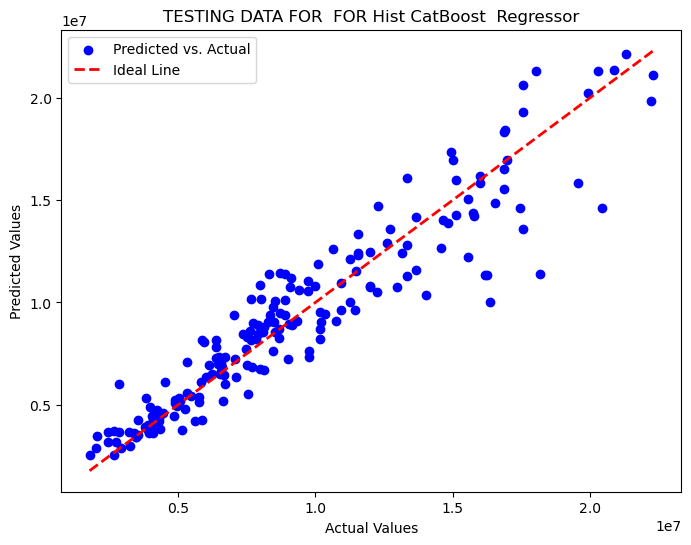

In [68]:
import catboost
from catboost import CatBoostRegressor
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train=standard.fit_transform(x_train) 
x_test=standard.transform(x_test)
model = CatBoostRegressor(iterations=10000,  # Number of boosting iterations
                         learning_rate=0.1,  # Step size shrinking to prevent overfitting
                         depth=9,  # Depth of the decision tree
                         loss_function='RMSE')  # Regression loss function

model.fit(x_train, y_train)


y_pred = model.predict(x_test)
score=model.score(x_test,y_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred, color='b', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')
# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("TESTING DATA FOR  FOR Hist CatBoost  Regressor")
plt.legend()
score

CATBOOST DID THE MOST OF THE WORK WITH 88% ACCURACY SCORE